In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn_qqplot import pplot

In [2]:
data = pd.ExcelFile("Data.xlsx")

In [3]:
#Equity data
equity_level = pd.read_excel(data,"Equity_Index").set_index(["Date"])
equity_returns = pd.read_excel(data,"Equity_Returns").set_index(["Date"])

In [4]:
equity_returns

,SSECompositeIndex,ASX200,BSESensex,FTSE100,S&P500,HangSengIndex,Nikkei225,ESTX50
Date,,,,,,,,
2004-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-03,NaN,NaN,NaN,0.000000,-0.811942,NaN,NaN,NaN
2005-01-04,NaN,NaN,-0.422063,0.679231,-1.167136,-1.345184,NaN,NaN
2005-01-05,0.737299,-0.473074,-2.889335,-0.845884,-0.362784,-2.004429,-0.696581,NaN
2005-01-06,-0.999009,-0.235183,-1.415884,0.380770,0.350586,-0.380114,0.478602,NaN
...,...,...,...,...,...,...,...,...
2022-12-26,0.646681,0.000000,1.204995,0.000000,0.000000,0.000000,0.650343,0.000000
2022-12-27,0.978844,0.000000,0.596053,0.000000,-0.404962,0.000000,0.159056,0.416029
2022-12-28,-0.263931,-0.299679,-0.028146,0.323835,-1.202064,1.561010,-0.405965,-0.627981


In [5]:
#FX data
fx_level = pd.read_excel(data,"FX_Index").set_index(["Date"])
fx_returns = pd.read_excel(data,"FX_Returns").set_index(["Date"])

In [6]:
fx_returns

,AUDUSD,CHFUSD,CNYUSD,EURUSD,GBPUSD,INRUSD,JPYUSD,SGDUSD
Date,,,,,,,,
2004-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-03,NaN,0.569926,0.000000,0.705377,-0.790406,0.249381,0.224364,0.429077
2005-01-04,NaN,1.795997,0.000000,1.415702,-1.103793,0.172749,1.557328,0.634769
2005-01-05,NaN,-0.059952,0.000000,0.014606,0.101818,0.225333,-0.392942,-0.200150
2005-01-06,NaN,0.608449,0.000000,0.735716,-0.478503,0.548300,0.923698,0.237013
...,...,...,...,...,...,...,...,...
2022-12-26,-0.513806,0.201932,0.081628,-0.604389,0.166785,-0.326755,0.327145,0.022194
2022-12-27,-0.475922,-0.093258,-0.393488,0.259230,0.200234,0.361722,-0.019569,-0.362505
2022-12-28,0.217857,-0.301499,-0.031606,0.028730,-0.470261,-0.152951,0.543811,0.059401


In [7]:
#Commodity data
commodity_level = pd.read_excel(data,"Commodity_Index")
commodity_level.rename(columns = {commodity_level.columns[0]:"Date"},inplace = True)
commodity_level = commodity_level.set_index(["Date"])

commodity_returns = pd.read_excel(data,"Commodity_Returns")
commodity_returns.rename(columns = {commodity_returns.columns[0]:"Date"},inplace = True)
commodity_returns = commodity_returns.set_index(["Date"])

In [8]:
commodity_level

,WTI,CRUDE,Gold,Natural Gas,Silver
Date,,,,,
2005-01-03,42.16,NaN,428.700012,5.790,6.477000
2005-01-04,43.96,40.75,428.500000,5.902,6.427000
2005-01-05,43.41,41.00,426.600006,5.833,6.512000
2005-01-06,45.51,43.25,421.000000,6.049,6.433000
2005-01-07,45.32,43.28,418.899994,6.001,6.429000
...,...,...,...,...,...
2022-12-26,NaN,NaN,NaN,NaN,NaN
2022-12-27,79.45,NaN,1814.800049,5.282,24.040001
2022-12-28,78.89,81.70,1807.900024,4.709,23.663000


In [9]:
#IR data
ir_data = pd.read_excel(data,"IR_Level").set_index(["DATE"])
ir_returns = pd.read_excel(data,"IR_Returns").set_index(["DATE"])

In [10]:
ir_data

,US_10Y,UK_10Y,EU_10Y,JPY_10Y,IND_10Y,Swiss_10Y,Canada_10Y,Australia_10Y
DATE,,,,,,,,
2005-01-01,4.22,4.5419,3.6336,1.310,NaN,2.249,4.260500,5.351842
2005-02-01,4.17,4.5884,3.6153,1.419,NaN,2.381,4.205000,5.397750
2005-03-01,4.50,4.7960,3.7625,1.325,NaN,2.355,4.358182,5.652619
2005-04-01,4.34,4.6218,3.5709,1.257,NaN,2.074,4.193810,5.472000
2005-05-01,4.14,4.4173,3.4074,1.238,NaN,2.014,4.073810,5.287727
...,...,...,...,...,...,...,...,...
2022-08-01,2.90,2.3278,2.0583,0.220,7.28,0.790,2.859091,3.370000
2022-09-01,3.52,3.5007,2.8138,0.240,7.28,1.160,3.145500,3.740000
2022-10-01,3.98,4.1096,3.1850,0.245,7.46,1.120,3.380500,3.920000


## Exploring Time Series Analysis

### Checking the trend of equity levels 

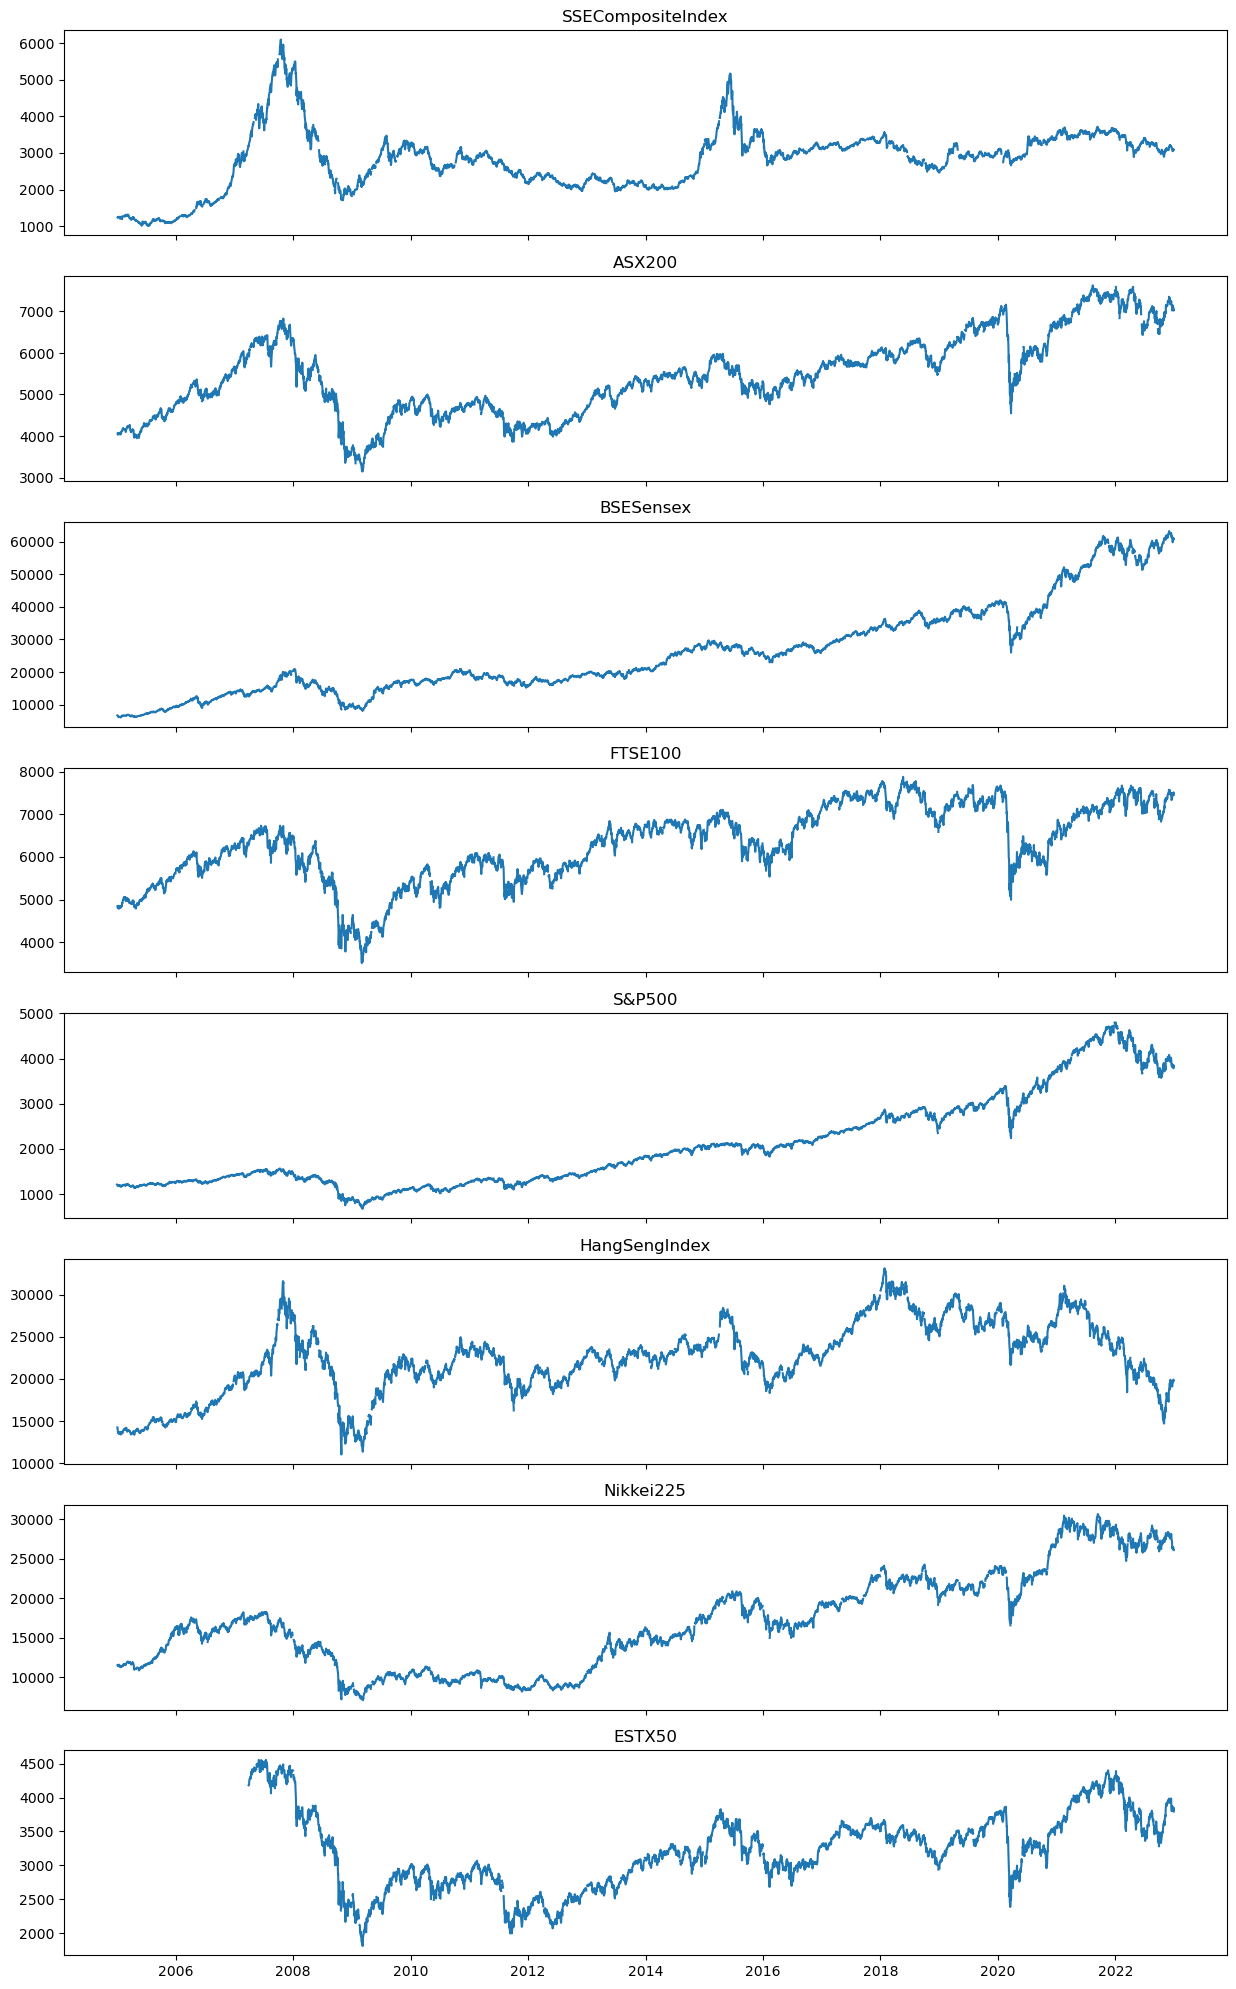

In [11]:
fig, ax = plt.subplots(8, 1, figsize=(15,25), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(equity_level.columns)):
    ax[i].plot(equity_level.iloc[:,i],label= equity_level.columns[i])
    ax[i].set_title(equity_level.columns[i])
    #plt.savefig('Figures/Time-Series Analysis/Trend_Equity')
    
plt.show() 

### Checking the trend of FX levels 

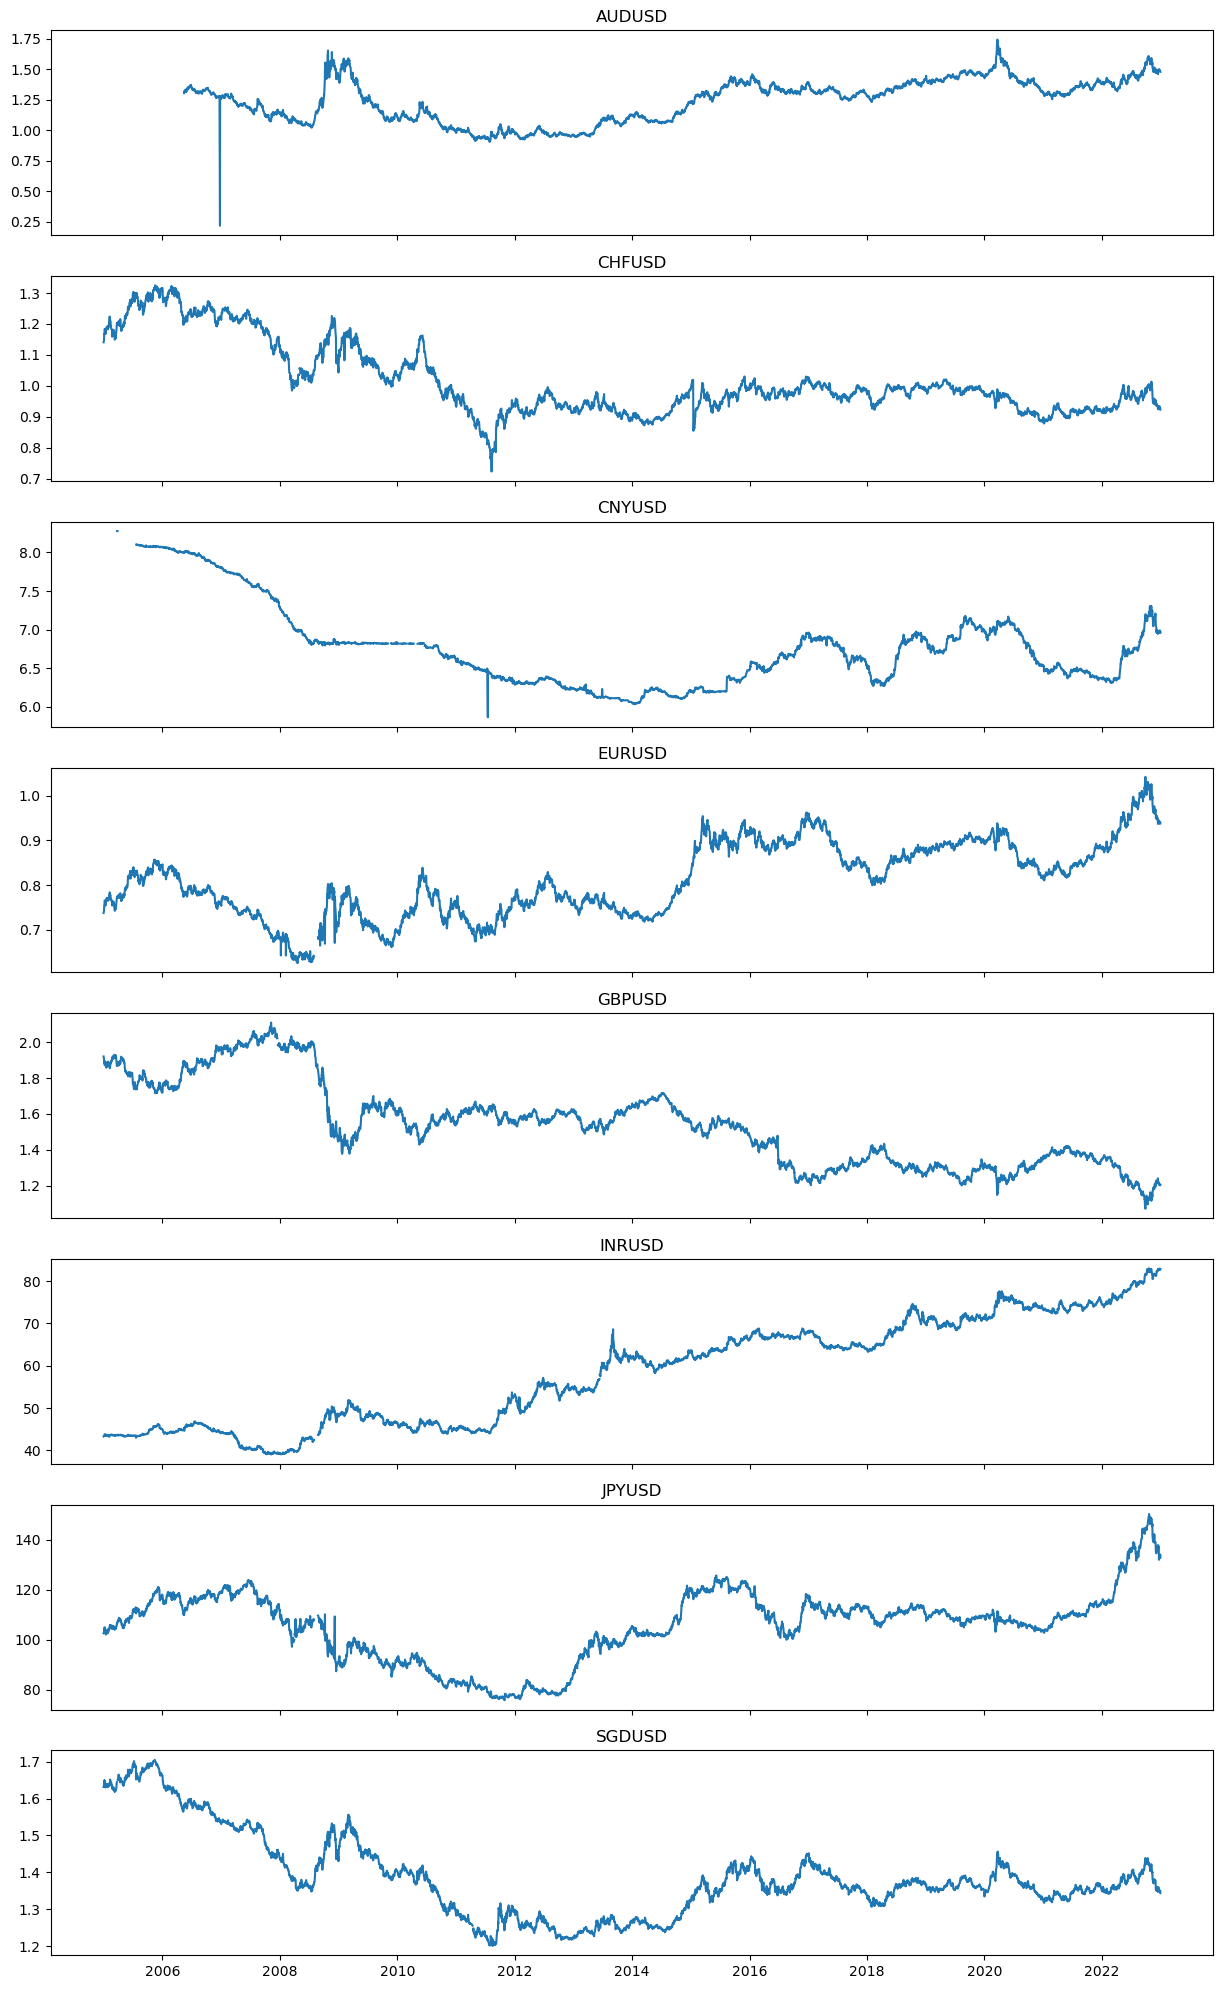

In [12]:
fig, ax = plt.subplots(8, 1, figsize=(15,25), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(fx_level.columns)):
    ax[i].plot(fx_level.iloc[:,i],label= fx_level.columns[i])
    ax[i].set_title(fx_level.columns[i])
    #plt.savefig('Figures/Time-Series Analysis/Trend_FX')
    
plt.show() 

### Checking the trend of Commodity levels 

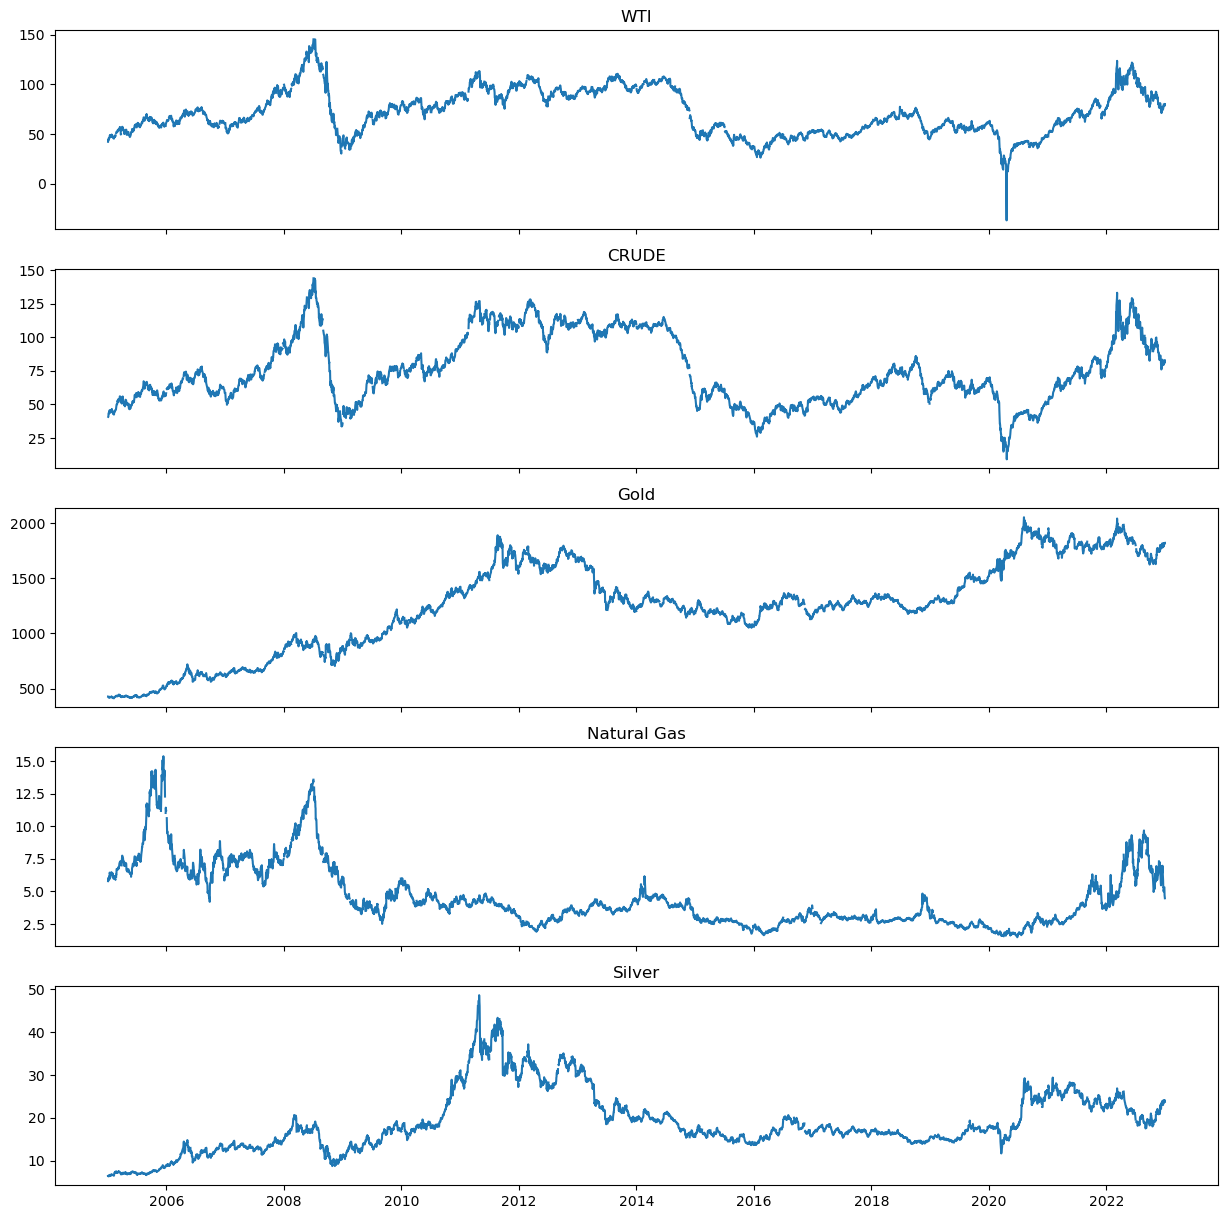

In [13]:
fig, ax = plt.subplots(5, 1, figsize=(15,15), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(commodity_level.columns)):
    ax[i].plot(commodity_level.iloc[:,i],label= commodity_level.columns[i])
    ax[i].set_title(commodity_level.columns[i])
    #plt.savefig('Figures/Time-Series Analysis/Trend_Commodity')
    
plt.show() 

### Checking the trend of IR levels 

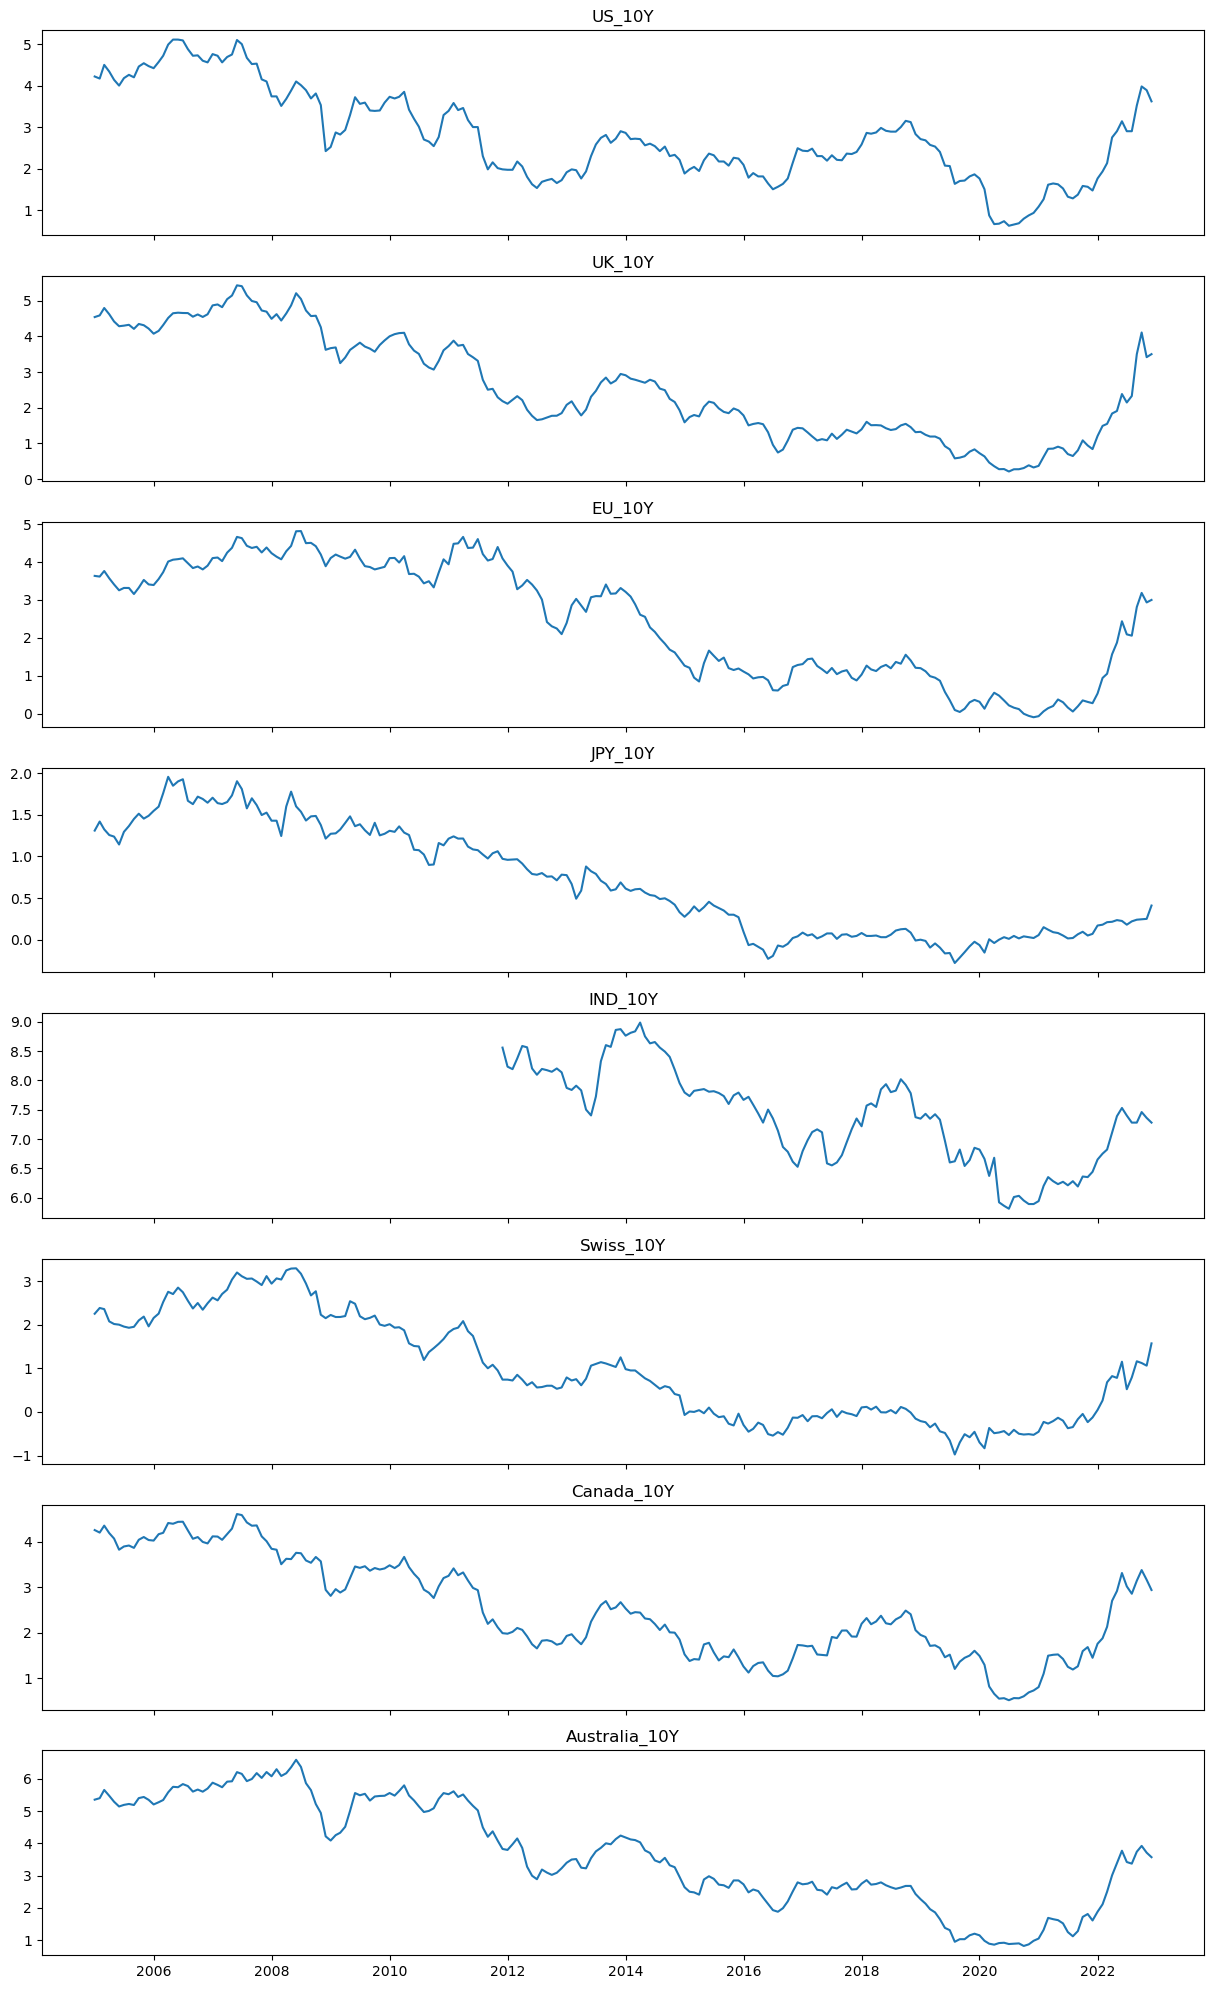

In [14]:
fig, ax = plt.subplots(8, 1, figsize=(15,25), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(ir_data.columns)):
    ax[i].plot(ir_data.iloc[:,i],label= ir_data.columns[i])
    ax[i].set_title(ir_data.columns[i])
    #plt.savefig('Figures/Time-Series Analysis/Trend_IR')
    
plt.show() 

### Plotting ACF and PACF plots

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### Plotting ACF  for Equity Levels

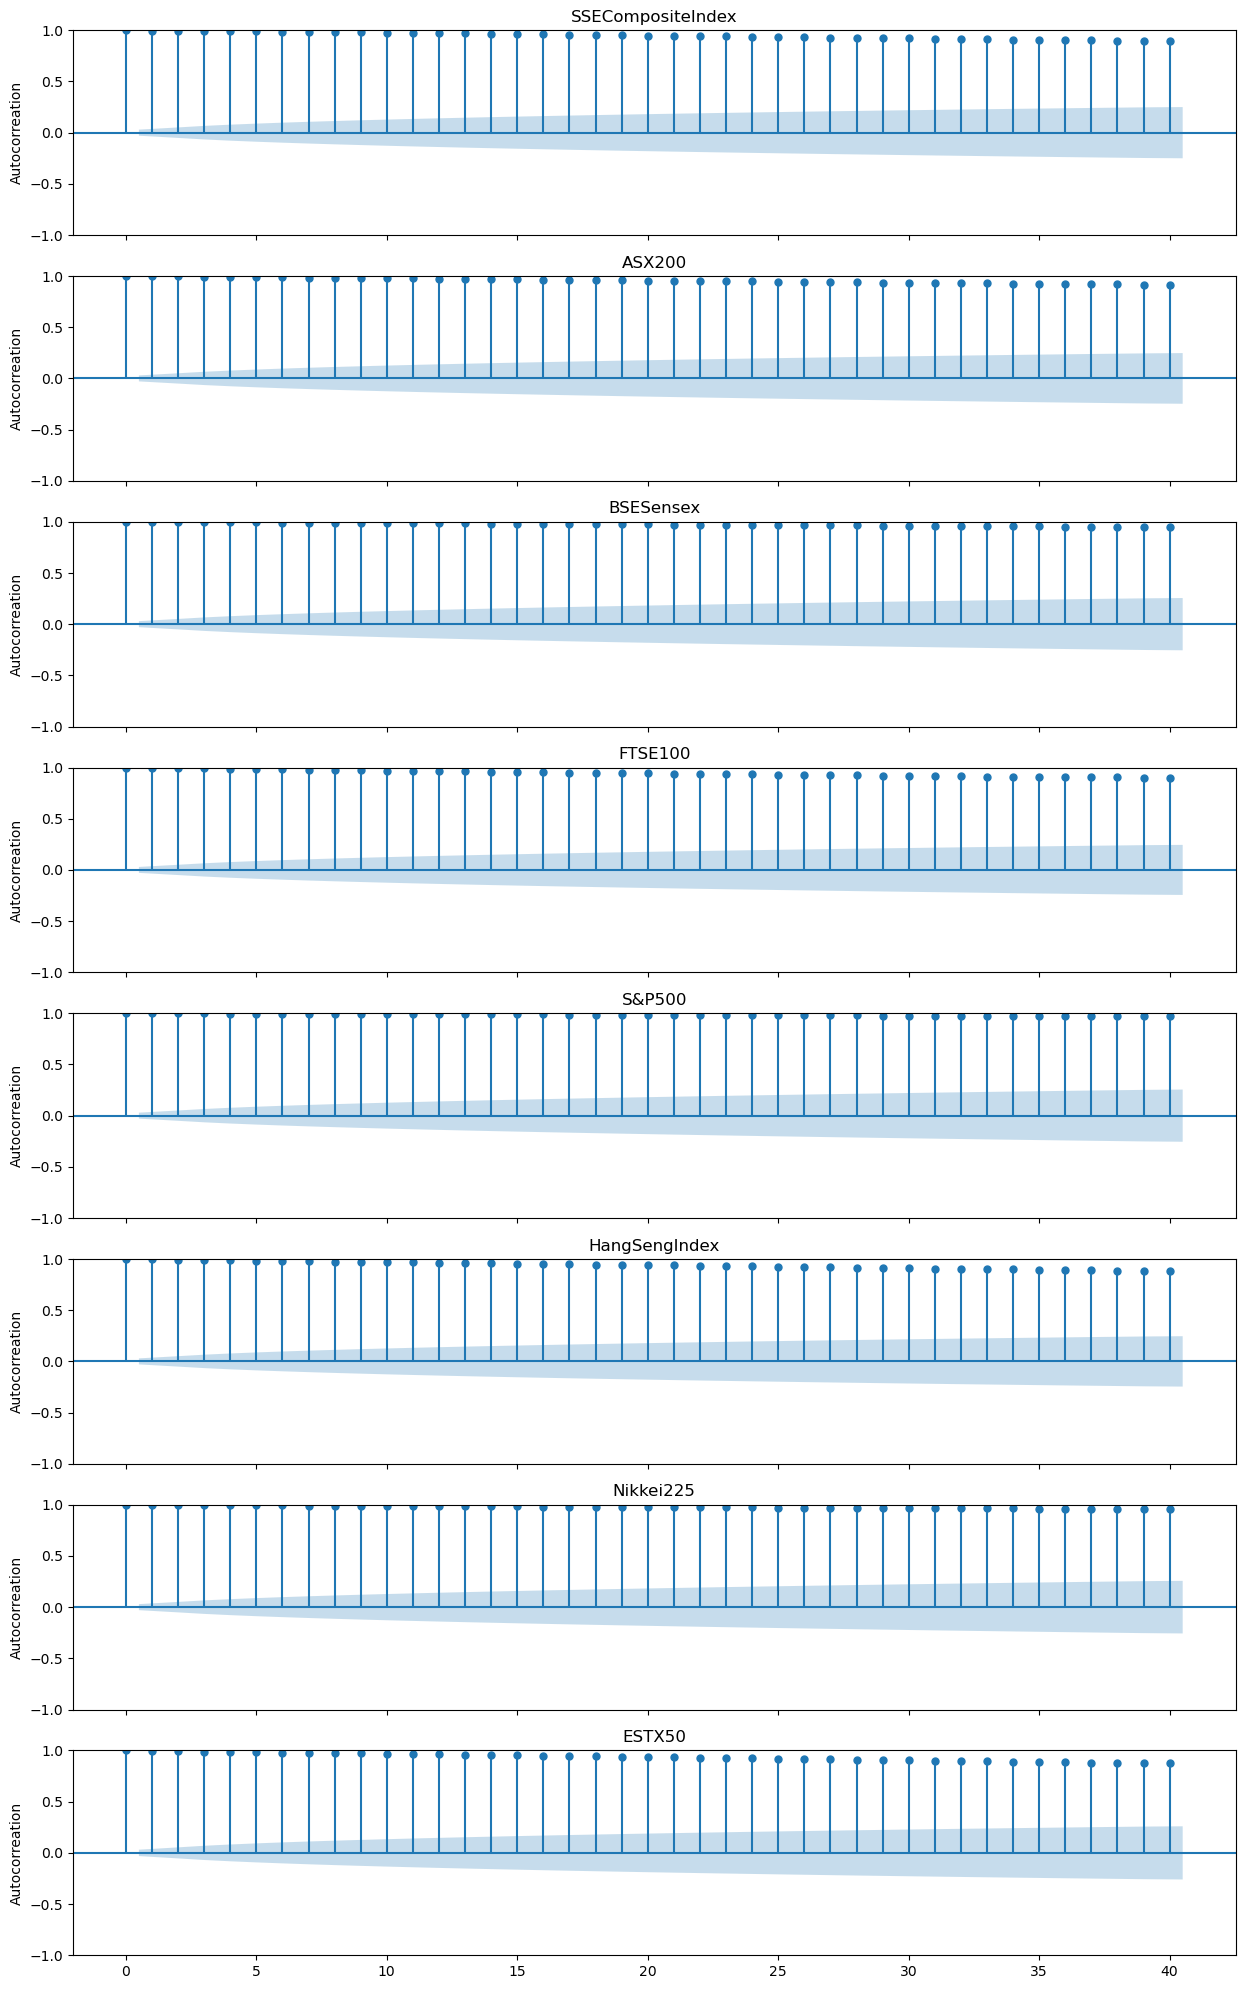

In [19]:
fig, ax = plt.subplots(8, 1, figsize=(15,25), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(equity_level.columns)):
    plot_acf(equity_level.iloc[:,i].dropna(), ax = ax[i], lags = 40)
    ax[i].set_title(equity_level.columns[i])
    ax[i].set_ylabel("Autocorreation")
    #plt.savefig('Figures/Time-Series Analysis/ACF_EquityLevels')
    
    
plt.show() 

#### Plotting PACF for Equity Levels

C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmode

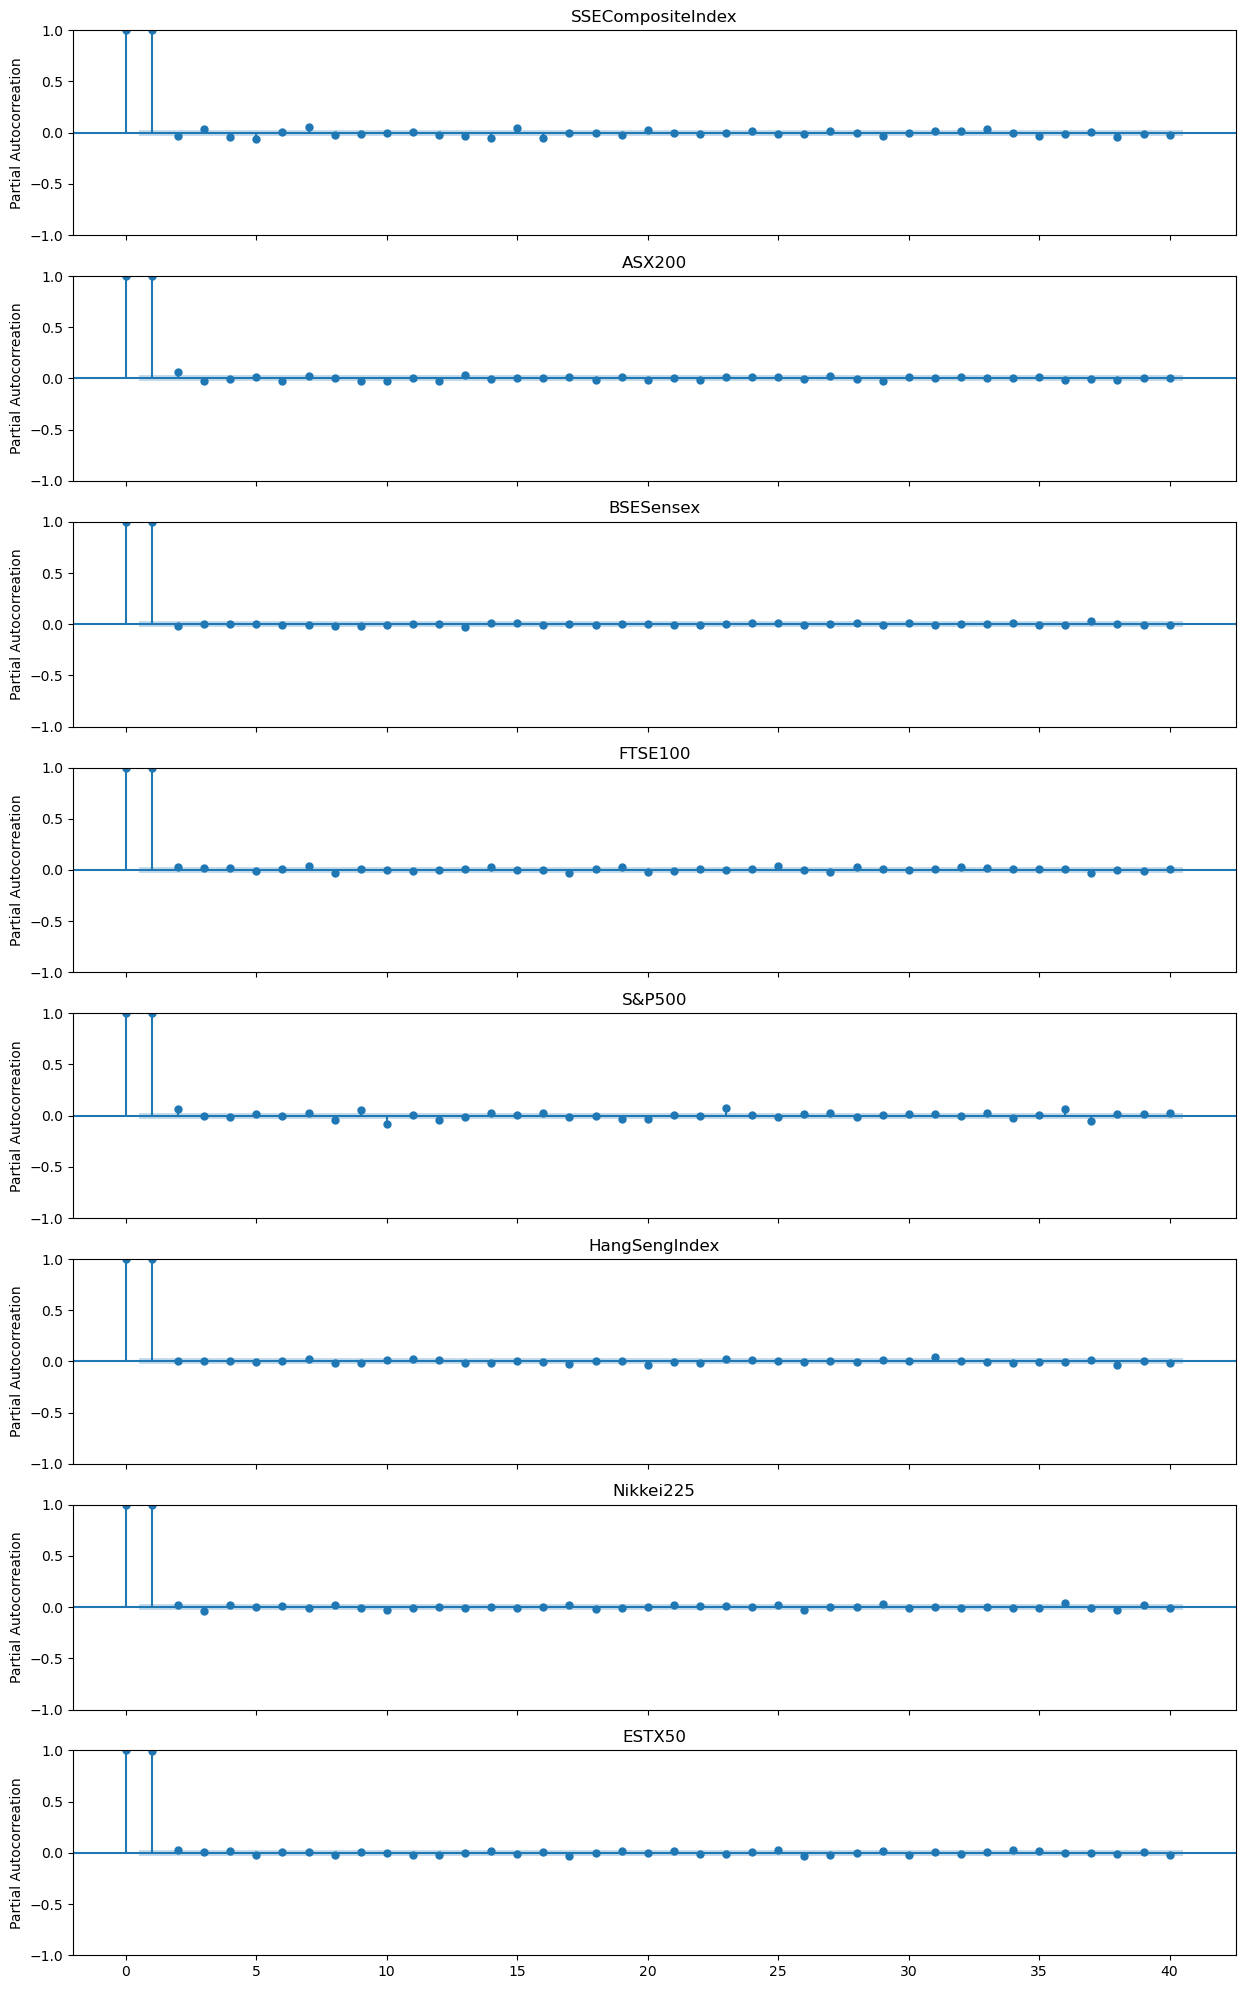

In [20]:
fig, ax = plt.subplots(8, 1, figsize=(15,25), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(equity_level.columns)):
    plot_pacf(equity_level.iloc[:,i].dropna(), ax = ax[i], lags = 40)
    ax[i].set_title(equity_level.columns[i])
    ax[i].set_ylabel("Partial Autocorreation")
    #plt.savefig('Figures/Time-Series Analysis/PACF_EquityLevels')
    
plt.show() 

#### Plotting ACF for Equity Returns

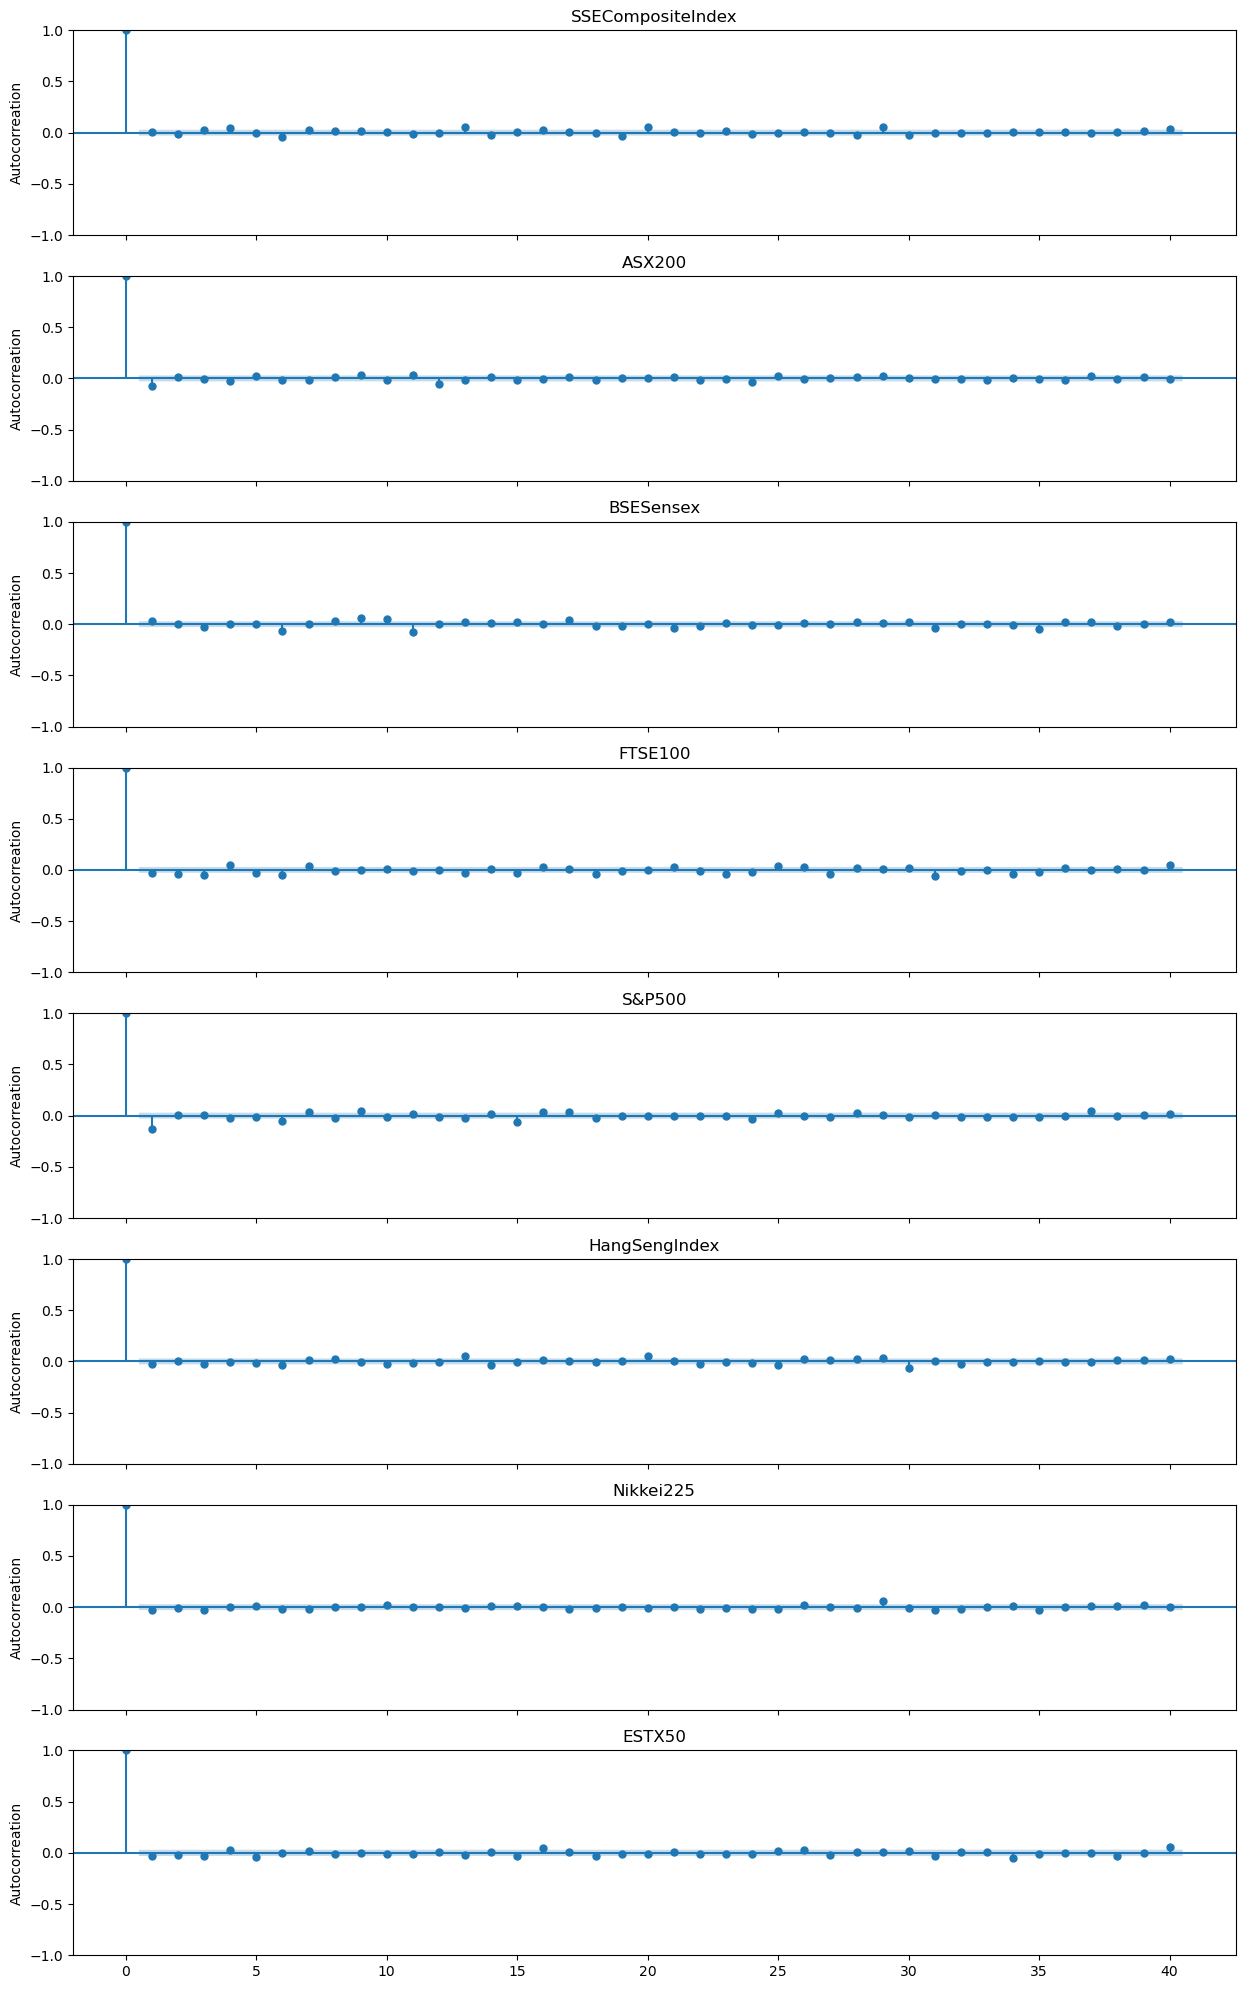

In [21]:
fig, ax = plt.subplots(8, 1, figsize=(15,25), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(equity_returns.columns)):
    plot_acf(equity_returns.iloc[:,i].dropna(), ax = ax[i], lags = 40)
    ax[i].set_title(equity_returns.columns[i])
    ax[i].set_ylabel("Autocorreation")
    #plt.savefig('Figures/Time-Series Analysis/ACF_EquityReturns')
    
plt.show() 

#### Plotting PACF for Equity Returns

C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmode

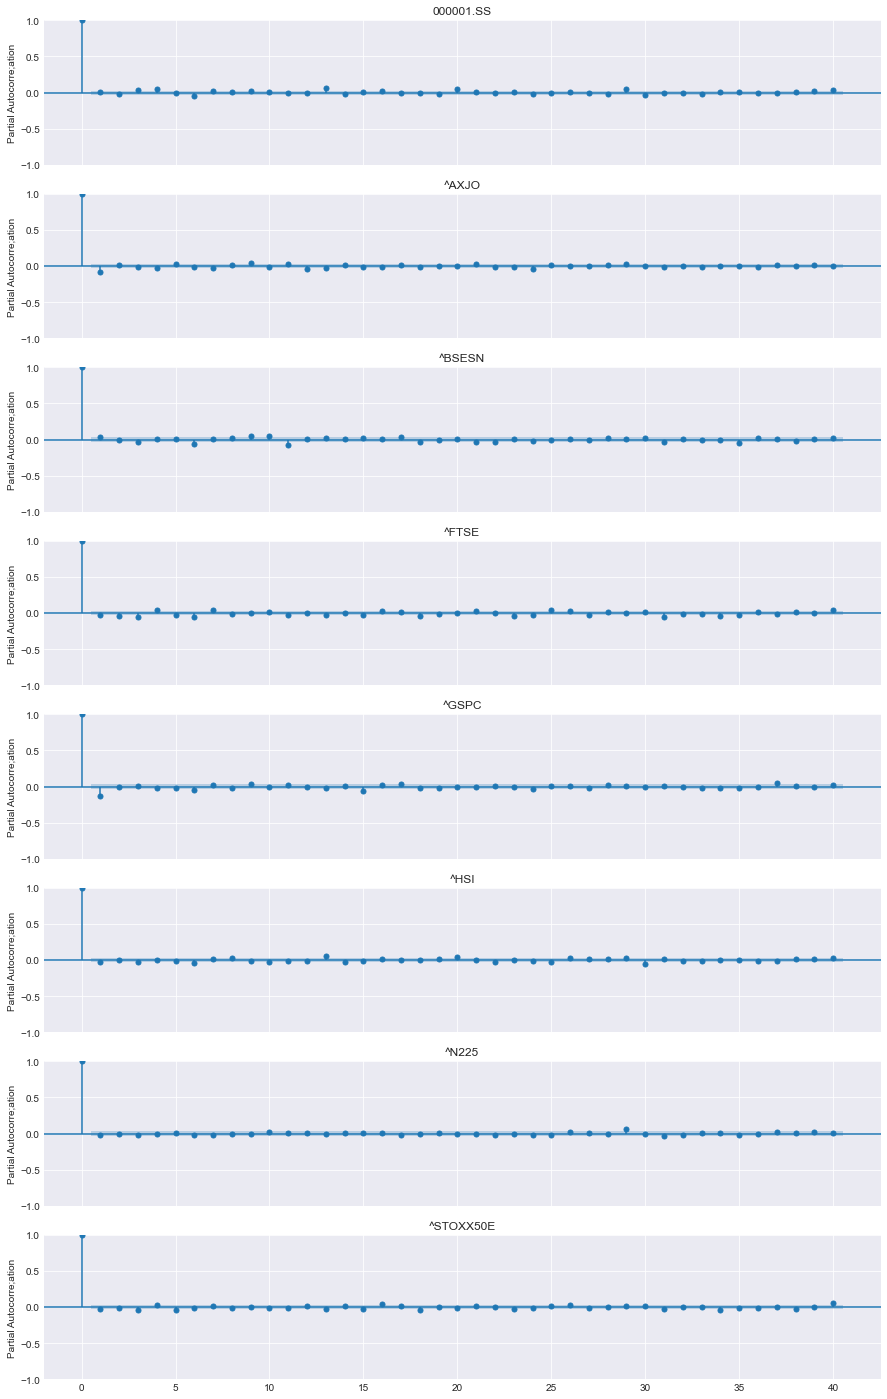

In [96]:
fig, ax = plt.subplots(8, 1, figsize=(15,25), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(equity_returns.columns)):
    plot_pacf(equity_returns.iloc[:,i].dropna(), ax = ax[i], lags = 40)
    ax[i].set_title(equity_returns.columns[i])
    ax[i].set_ylabel("Partial Autocorreation")
    
plt.show() 

#### Plotting ACF for FX Levels

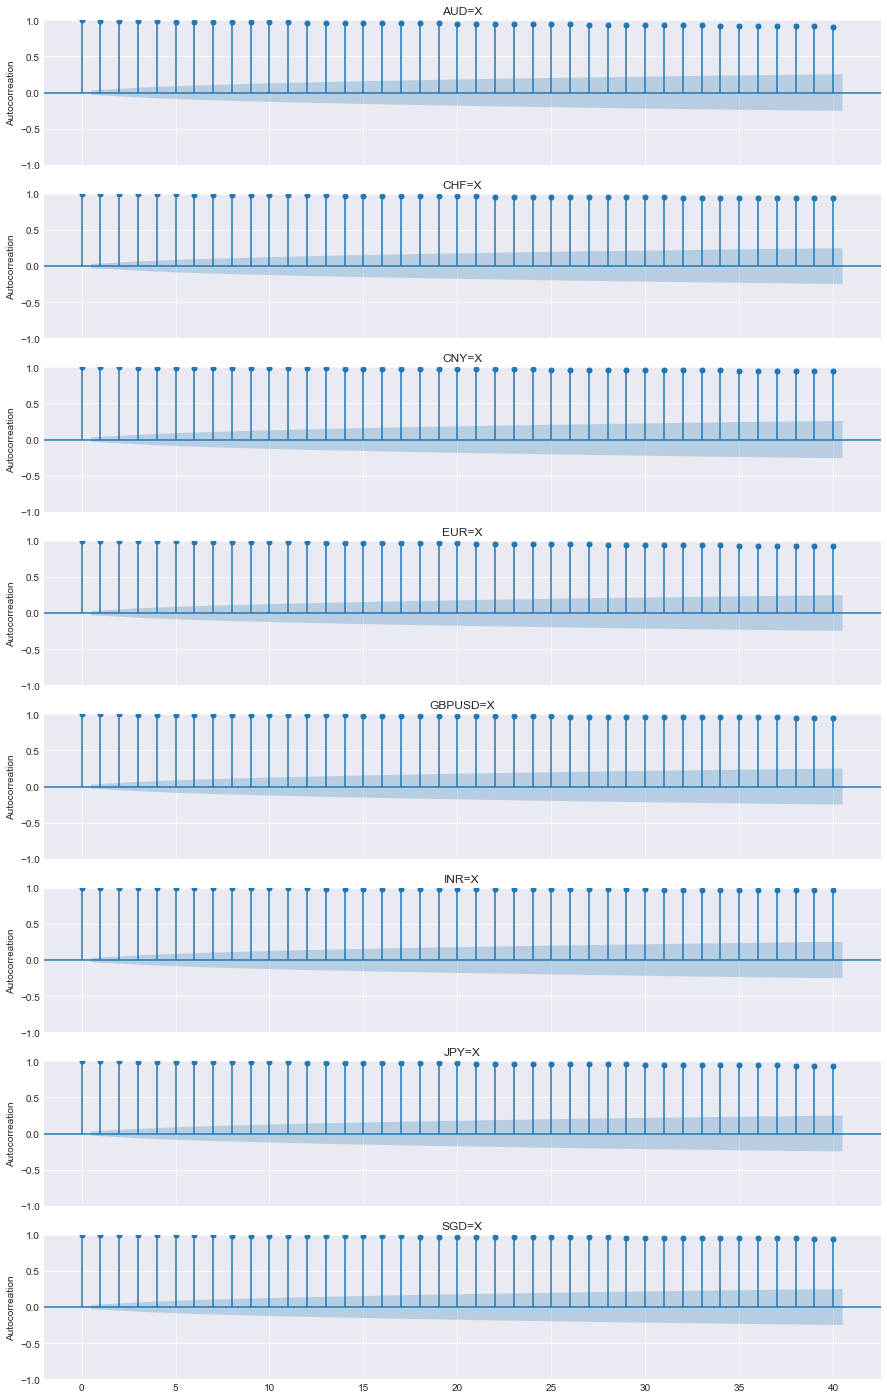

In [97]:
fig, ax = plt.subplots(8, 1, figsize=(15,25), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(fx_level.columns)):
    plot_acf(fx_level.iloc[:,i].dropna(), ax = ax[i], lags = 40)
    ax[i].set_title(fx_level.columns[i])
    ax[i].set_ylabel("Autocorreation")
    
plt.show() 

#### Plotting PACF for FX Levels 

C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmode

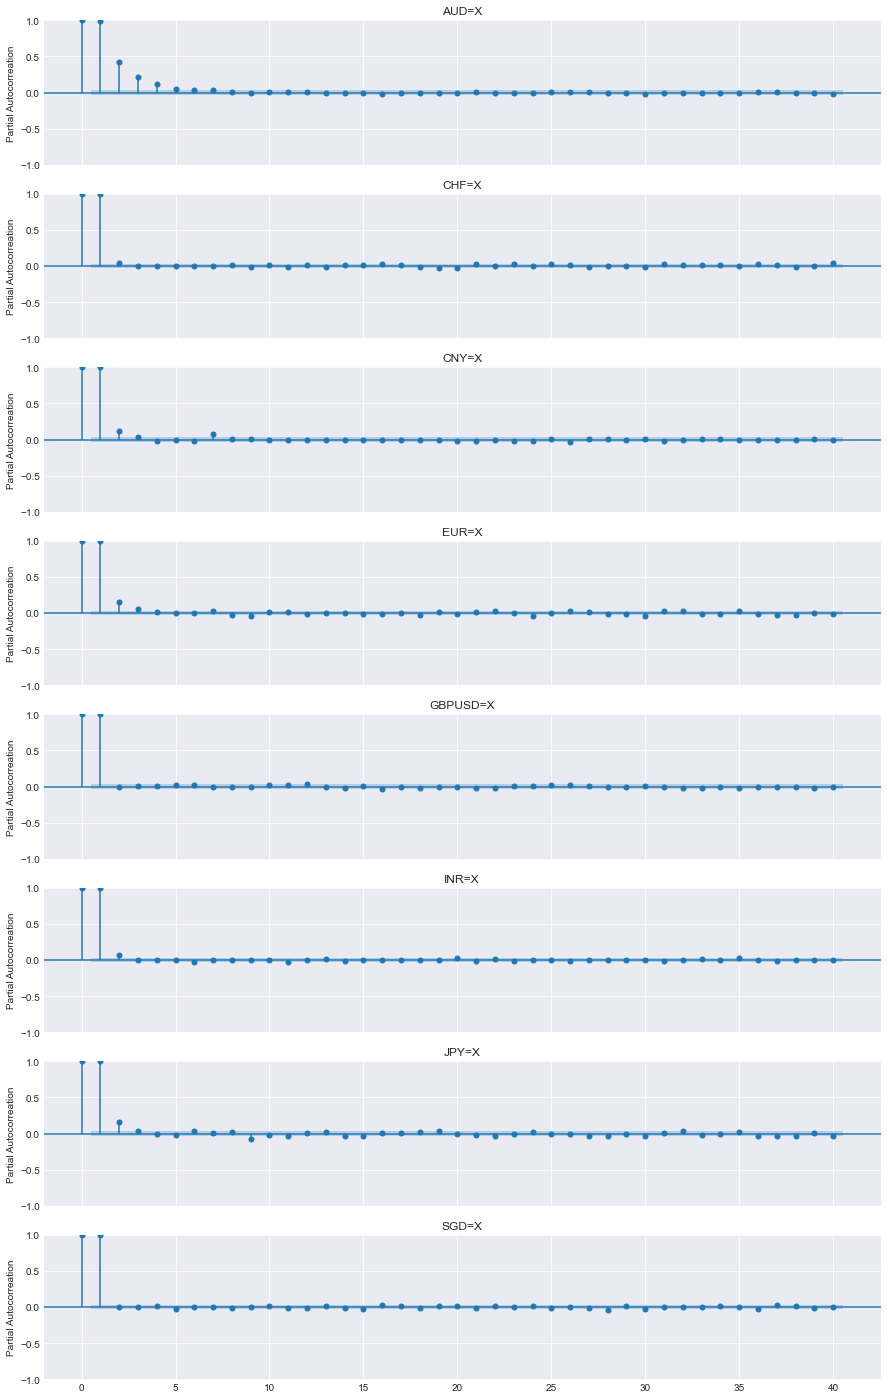

In [98]:
fig, ax = plt.subplots(8, 1, figsize=(15,25), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(fx_level.columns)):
    plot_pacf(fx_level.iloc[:,i].dropna(), ax = ax[i], lags = 40)
    ax[i].set_title(fx_level.columns[i])
    ax[i].set_ylabel("Partial Autocorreation")
    
plt.show() 

#### Plotting ACF for FX Returns

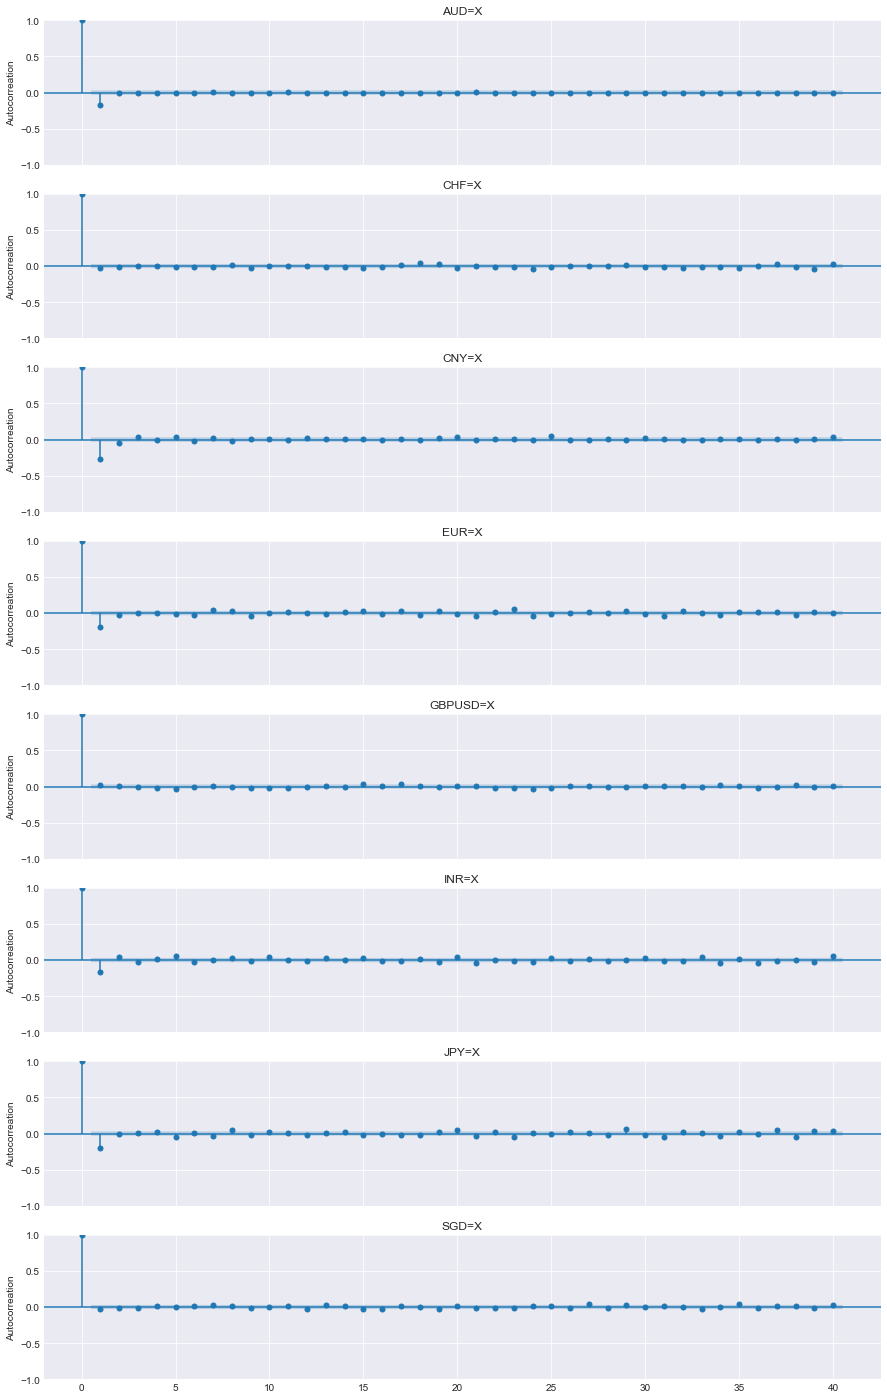

In [99]:
fig, ax = plt.subplots(8, 1, figsize=(15,25), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(fx_returns.columns)):
    plot_acf(fx_returns.iloc[:,i].dropna(), ax = ax[i], lags = 40)
    ax[i].set_title(fx_returns.columns[i])
    ax[i].set_ylabel("Autocorreation")
    
    
plt.show() 

#### Plotting PACF for FX Returns

C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmode

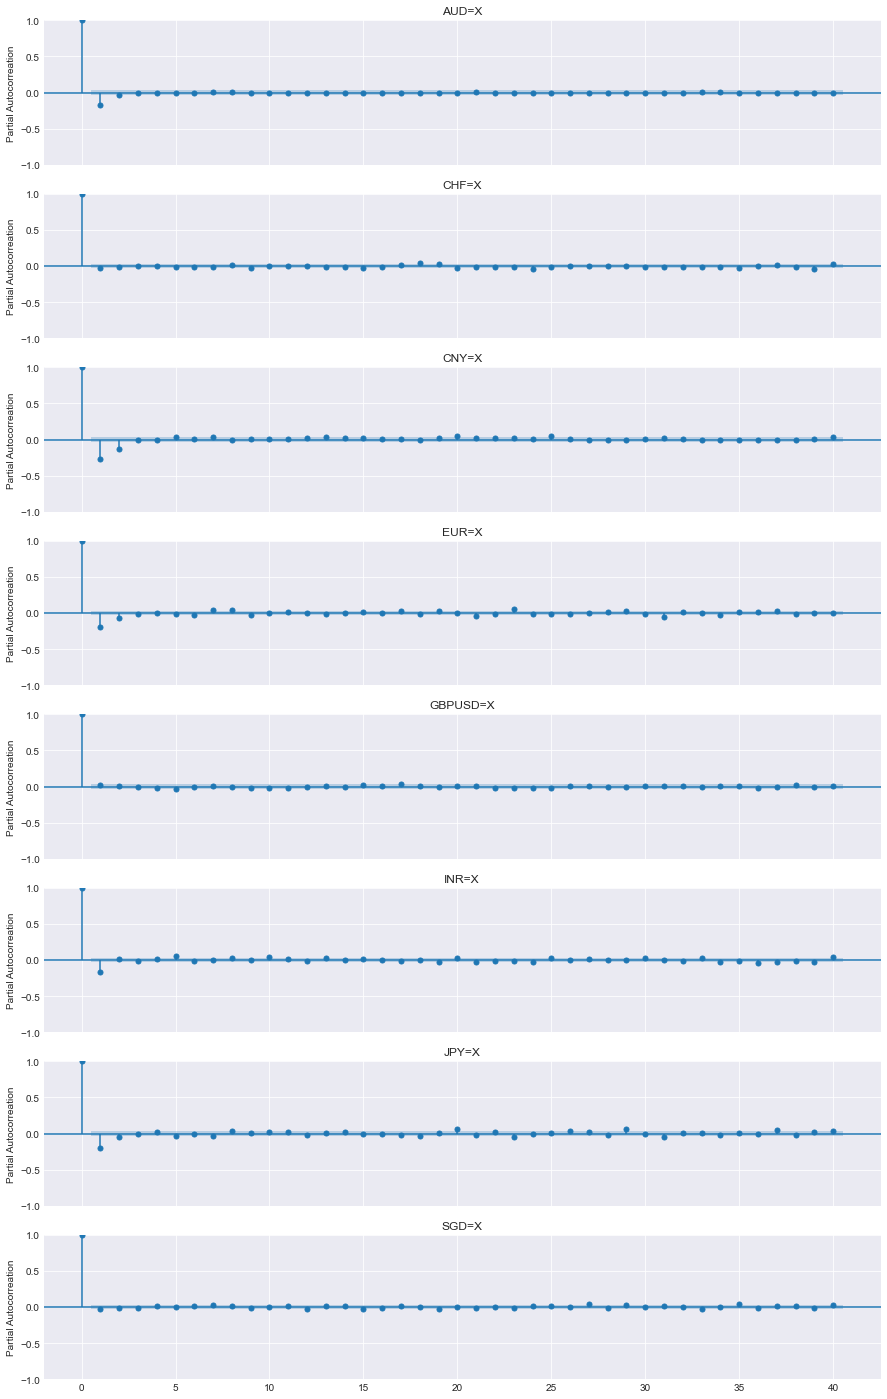

In [100]:
fig, ax = plt.subplots(8, 1, figsize=(15,25), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(fx_returns.columns)):
    plot_pacf(fx_returns.iloc[:,i].dropna(), ax = ax[i], lags = 40)
    ax[i].set_title(fx_returns.columns[i])
    ax[i].set_ylabel("Partial Autocorreation")
    
plt.show() 

#### Plotting ACF for Commodity Levels

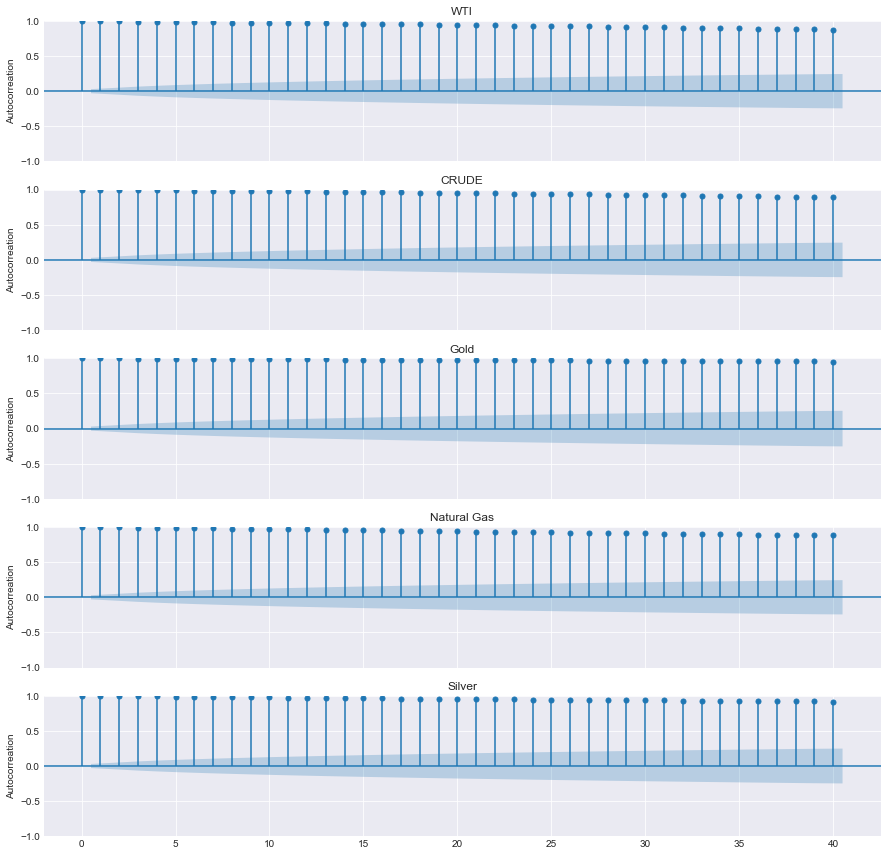

In [102]:
fig, ax = plt.subplots(5, 1, figsize=(15,15), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(commodity_level.columns)):
    plot_acf(commodity_level.iloc[:,i].dropna(), ax = ax[i], lags = 40)
    ax[i].set_title(commodity_level.columns[i])
    ax[i].set_ylabel("Autocorreation")
    
plt.show() 

#### Plotting PACF for Commodity Levels

C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmode

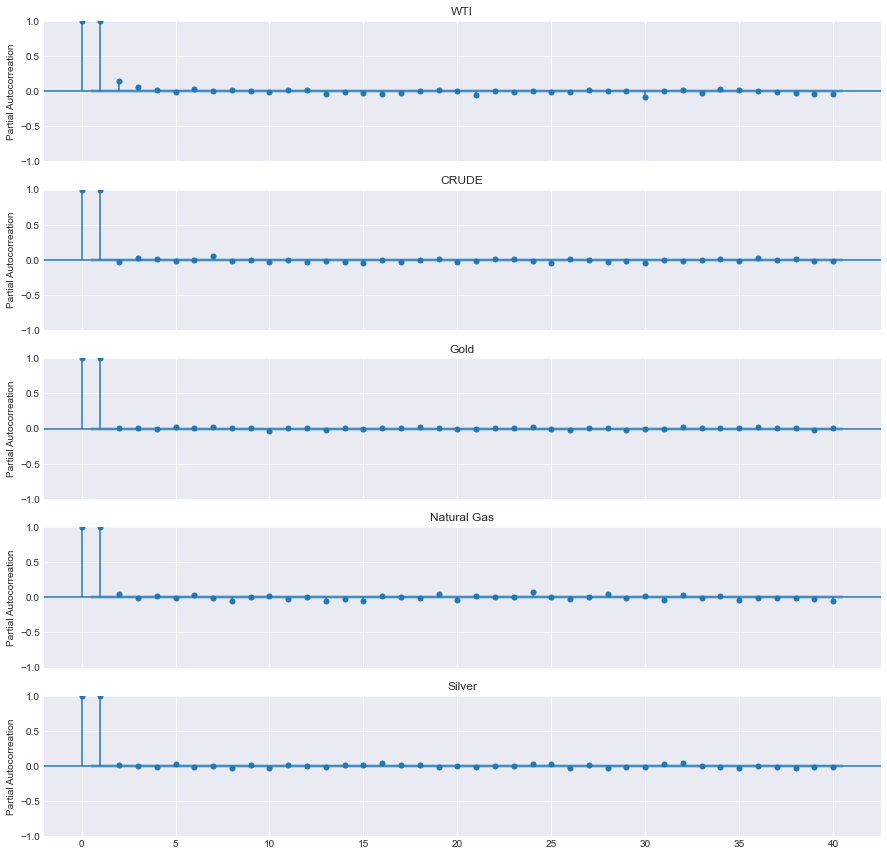

In [105]:
fig, ax = plt.subplots(5, 1, figsize=(15,15), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(commodity_level.columns)):
    plot_pacf(commodity_level.iloc[:,i].dropna(), ax = ax[i], lags = 40)
    ax[i].set_title(commodity_level.columns[i])
    ax[i].set_ylabel("Partial Autocorreation")
    
plt.show() 

#### Plotting ACF for Commodity Returns

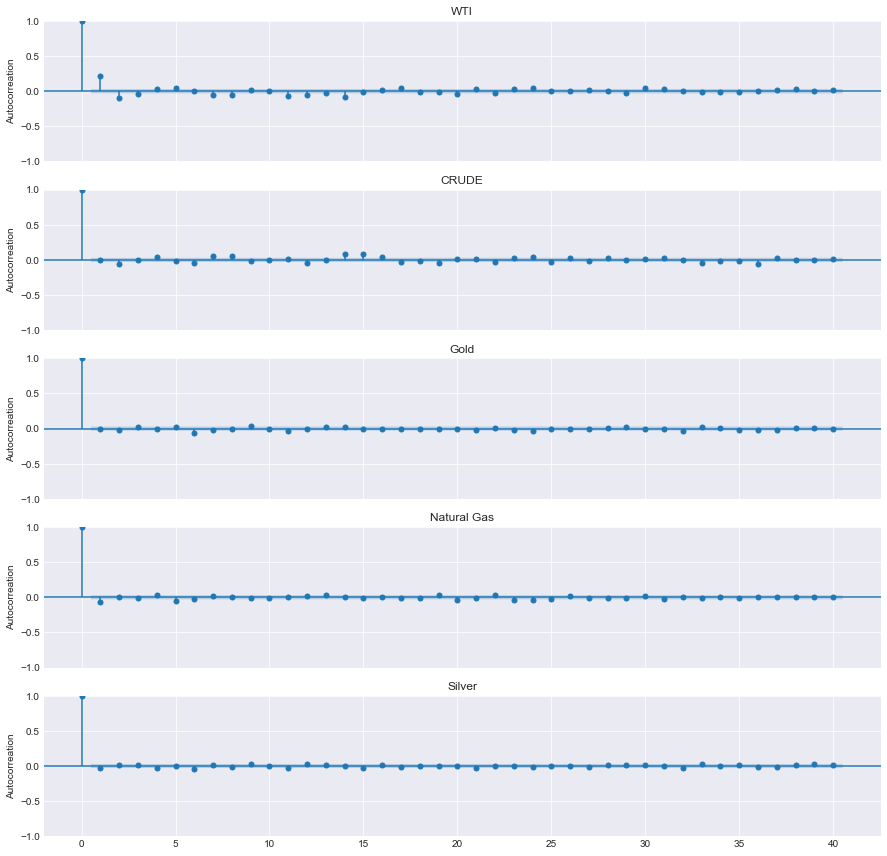

In [106]:
fig, ax = plt.subplots(5, 1, figsize=(15,15), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(commodity_returns.columns)):
    plot_acf(commodity_returns.iloc[:,i].dropna(), ax = ax[i], lags = 40)
    ax[i].set_title(commodity_returns.columns[i])
    ax[i].set_ylabel("Autocorreation")
    
plt.show() 

#### Plotting PACF for Commodity Returns

C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmode

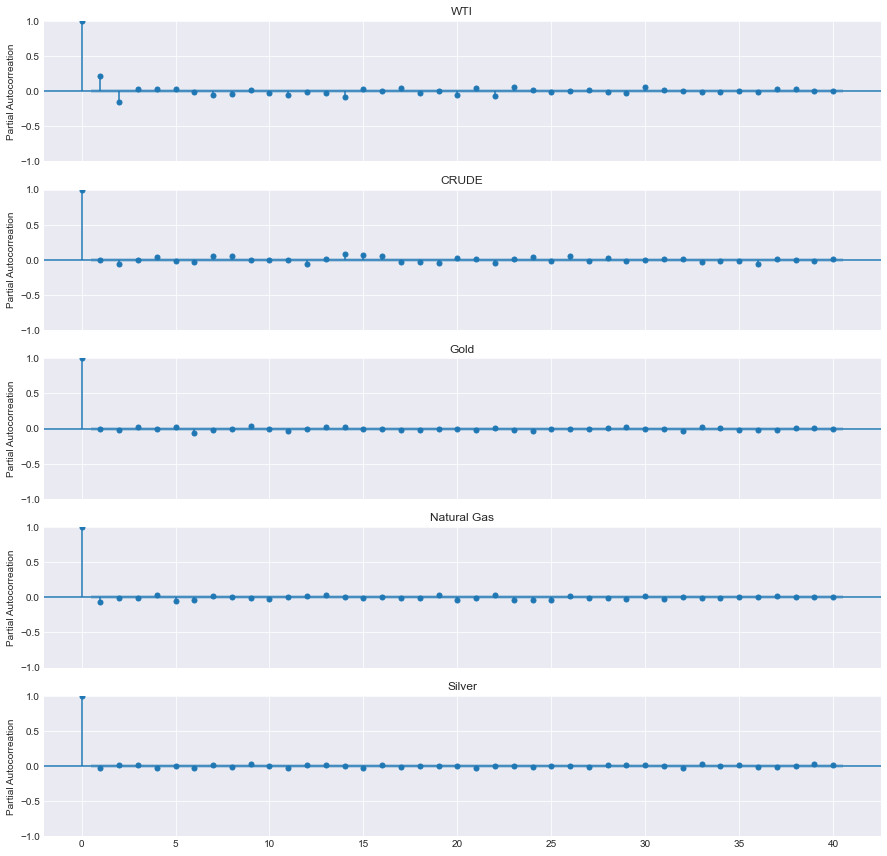

In [107]:
fig, ax = plt.subplots(5, 1, figsize=(15,15), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(commodity_returns.columns)):
    plot_pacf(commodity_returns.iloc[:,i].dropna(), ax = ax[i], lags = 40)
    ax[i].set_title(commodity_returns.columns[i])
    ax[i].set_ylabel("Partial Autocorreation")
    
plt.show() 

#### Plotting ACF for IR Levels

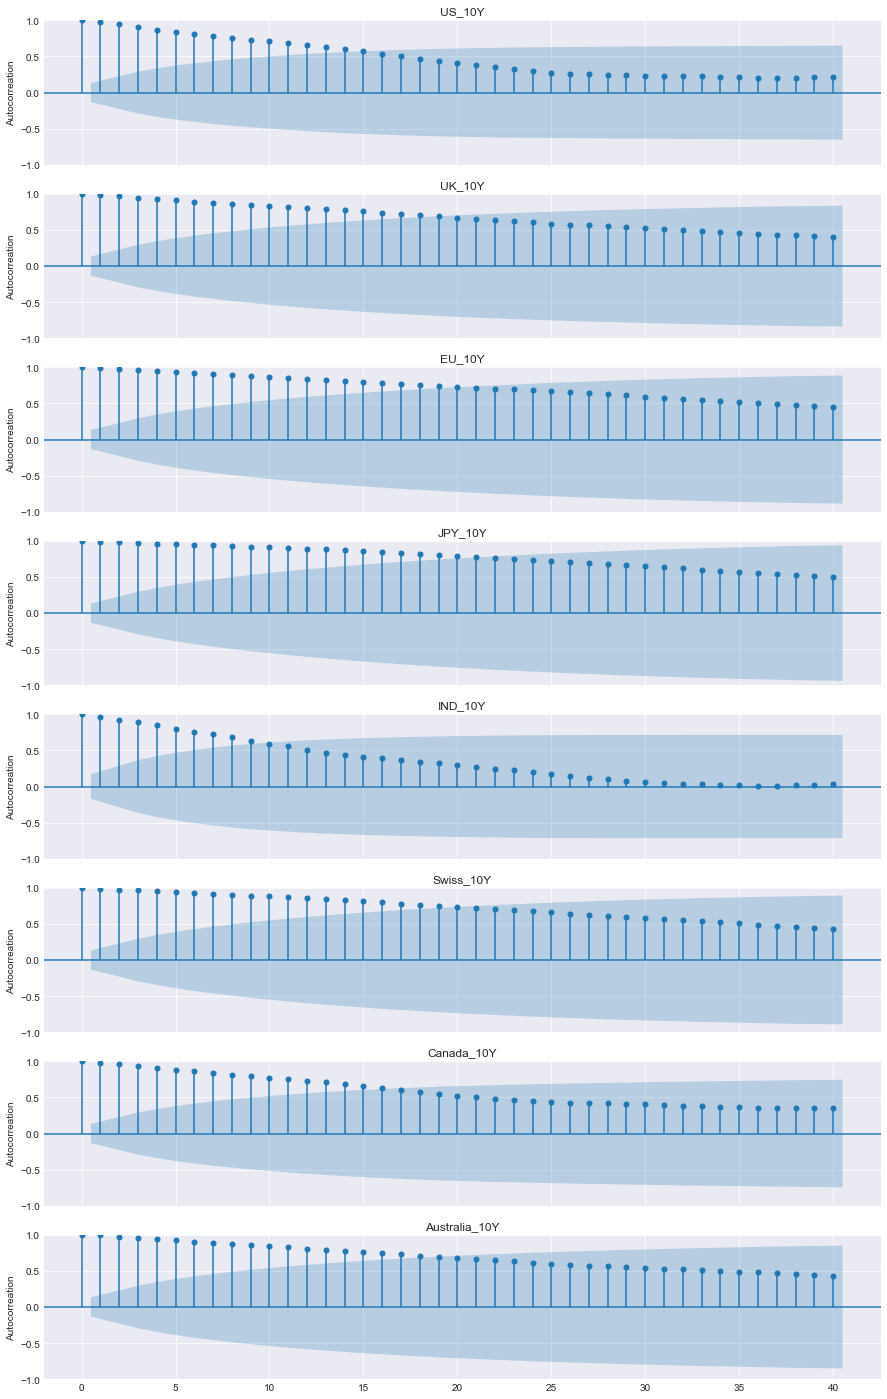

In [108]:
fig, ax = plt.subplots(8, 1, figsize=(15,25), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(ir_data.columns)):
    plot_acf(ir_data.iloc[:,i].dropna(), ax = ax[i], lags = 40)
    ax[i].set_title(ir_data.columns[i])
    ax[i].set_ylabel("Autocorreation")
    
plt.show() 

#### Plotting PACF for IR Levels

C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmode

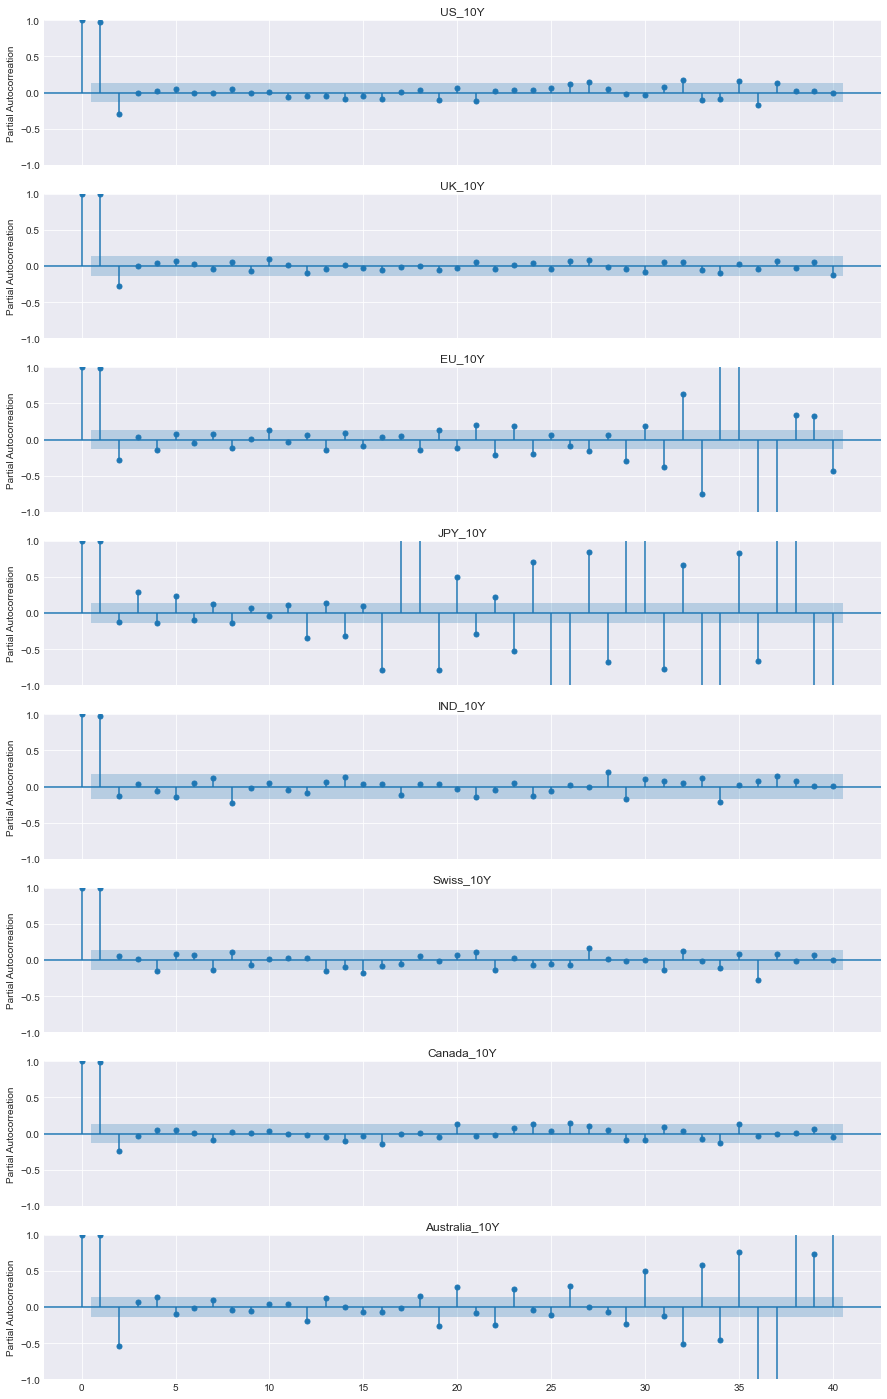

In [109]:
fig, ax = plt.subplots(8, 1, figsize=(15,25), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(ir_data.columns)):
    plot_pacf(ir_data.iloc[:,i].dropna(), ax = ax[i], lags = 40)
    ax[i].set_title(ir_data.columns[i])
    ax[i].set_ylabel("Partial Autocorreation")
    
plt.show() 

#### Plotting ACF for IR Returns

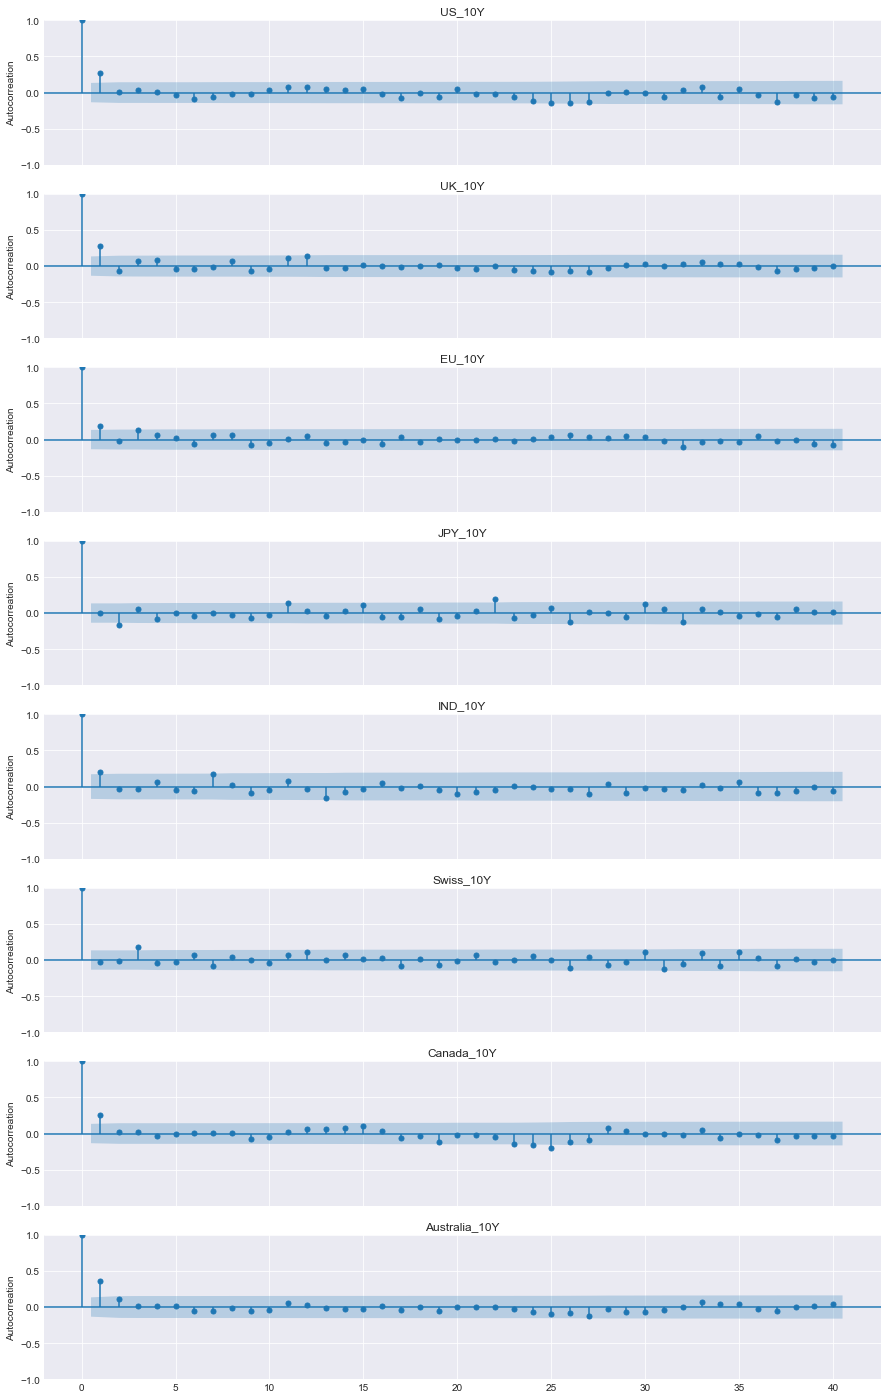

In [110]:
fig, ax = plt.subplots(8, 1, figsize=(15,25), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(ir_returns.columns)):
    plot_acf(ir_returns.iloc[:,i].dropna(), ax = ax[i], lags = 40)
    ax[i].set_title(ir_returns.columns[i])
    ax[i].set_ylabel("Autocorreation")
    
plt.show() 

#### Plotting PACF for IR Returns

C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\gaura\anaconda3\lib\site-packages\statsmode

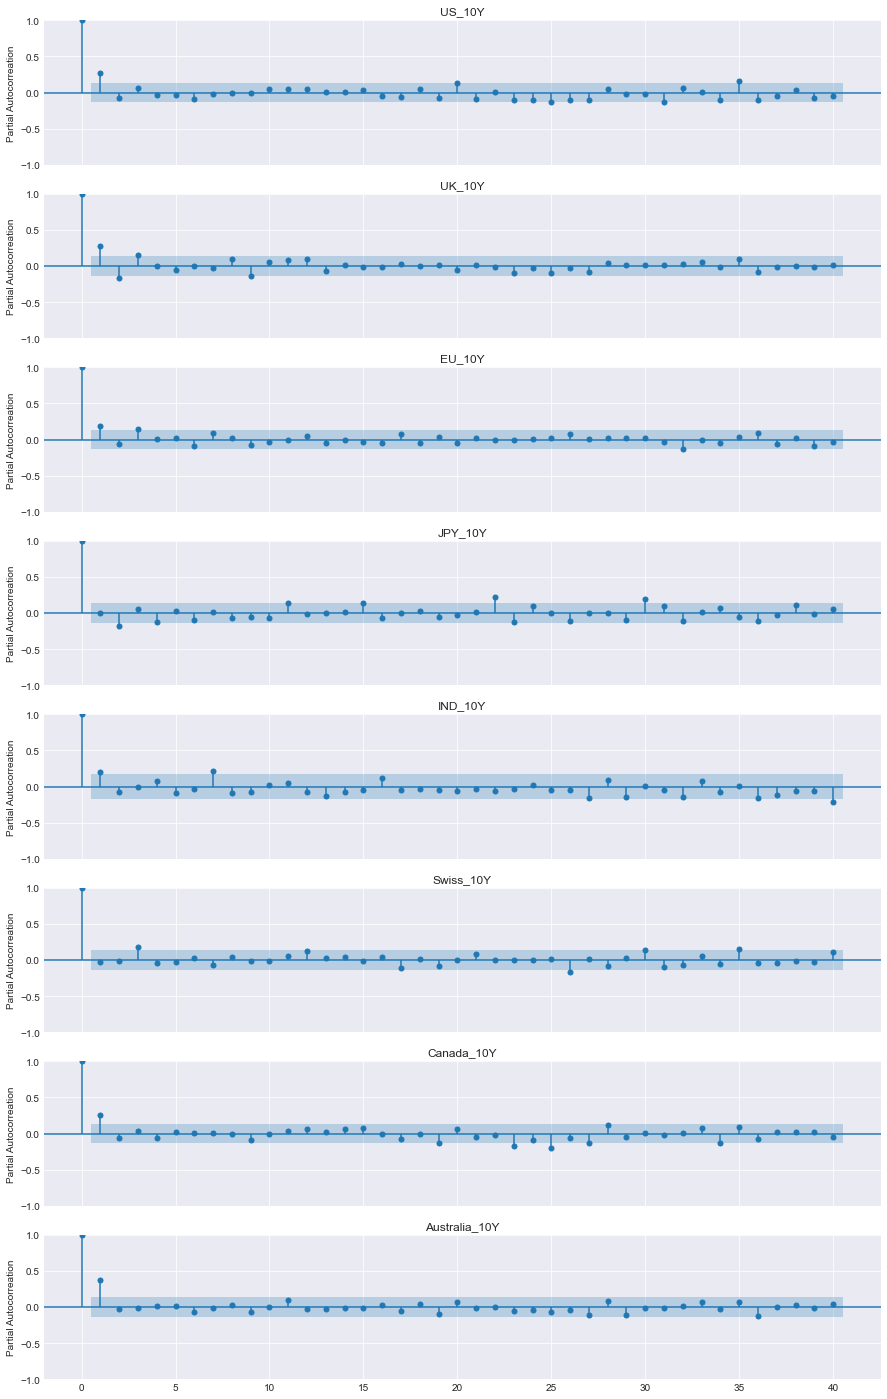

In [112]:
fig, ax = plt.subplots(8, 1, figsize=(15,25), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(ir_returns.columns)):
    plot_pacf(ir_returns.iloc[:,i].dropna(), ax = ax[i], lags = 40)
    ax[i].set_title(ir_returns.columns[i])
    ax[i].set_ylabel("Partial Autocorreation")
    
plt.show() 

## Visualizing Volatility clustering

### Equity Volatility

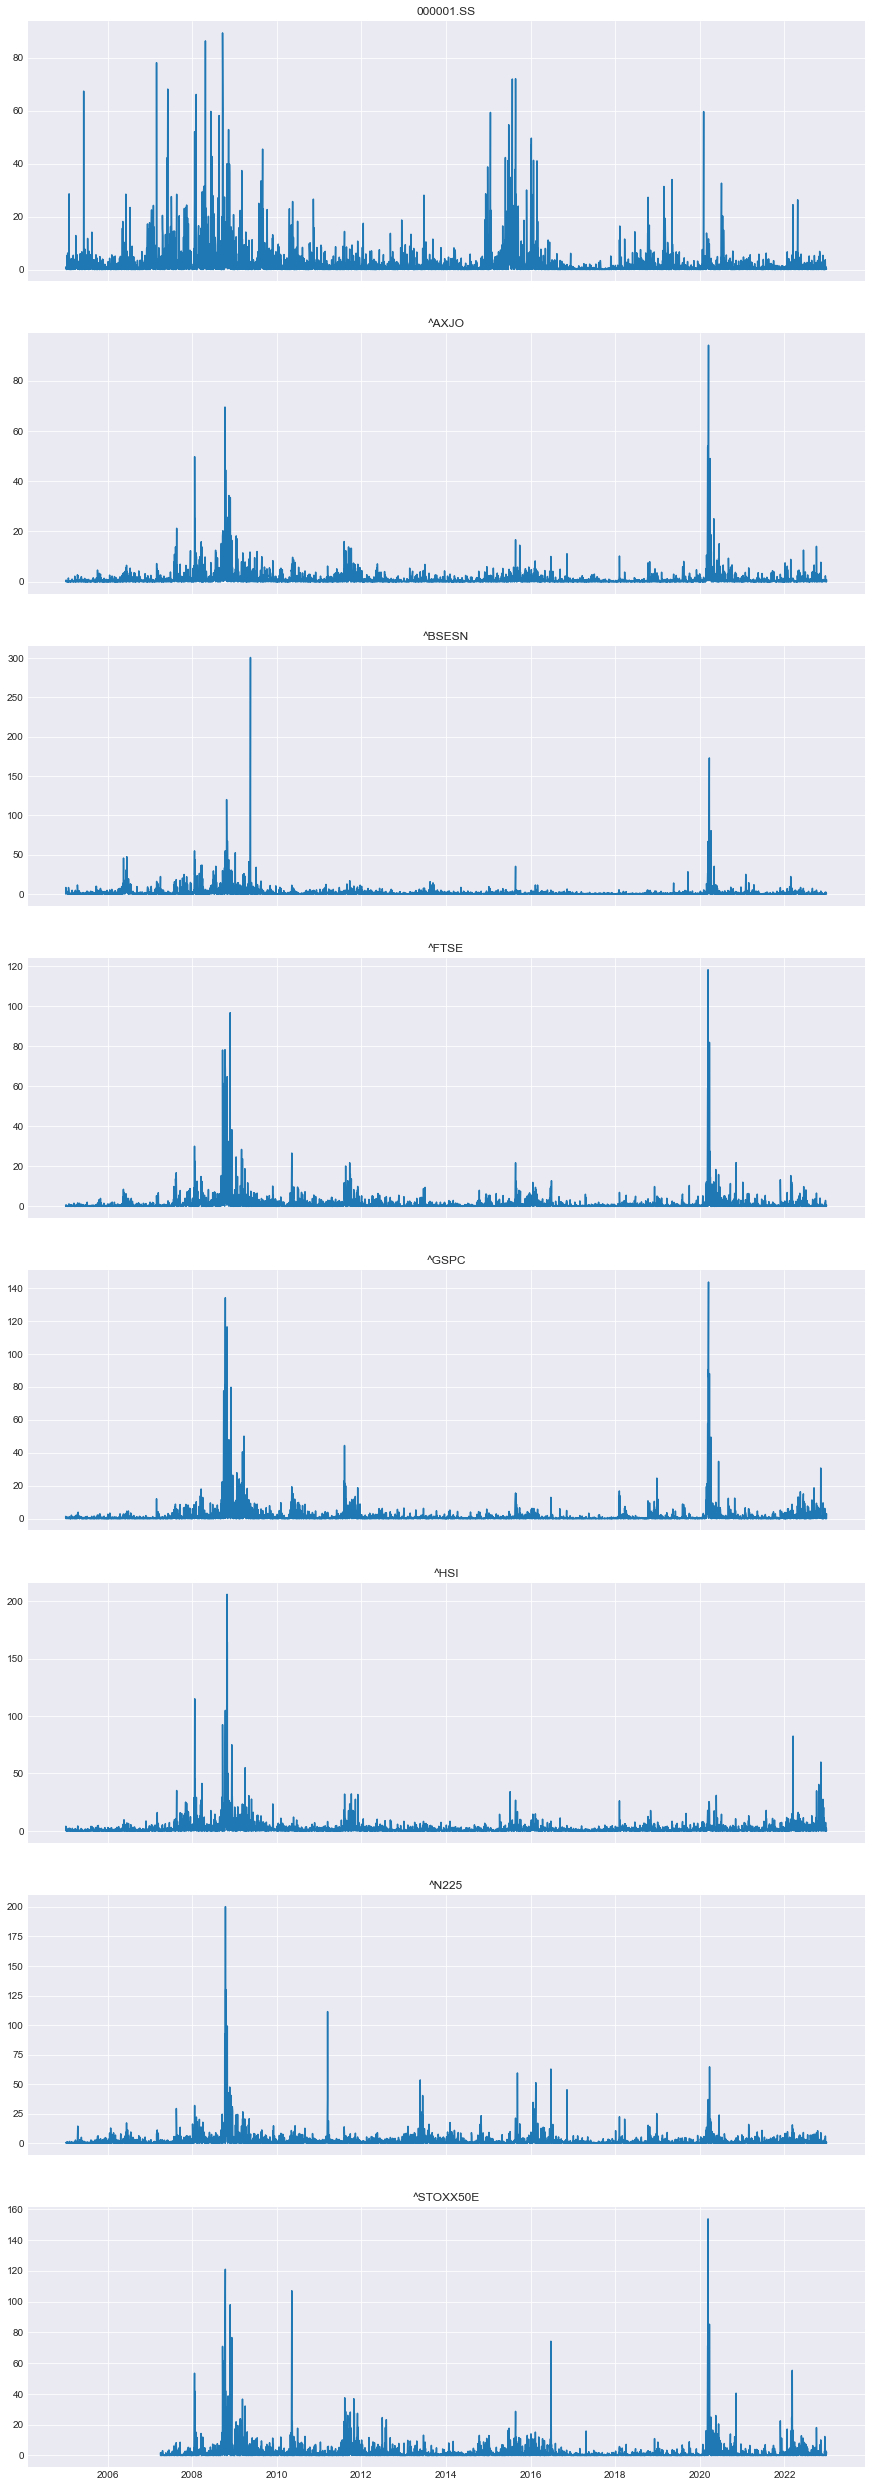

In [116]:
fig, ax = plt.subplots(8, 1, figsize=(15,45), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(equity_returns.columns)):
    ax[i].plot(equity_returns.iloc[:,i]**2,label= equity_returns.columns[i])
    ax[i].set_title(equity_returns.columns[i])
    
plt.show() 

### FX Volatiltity

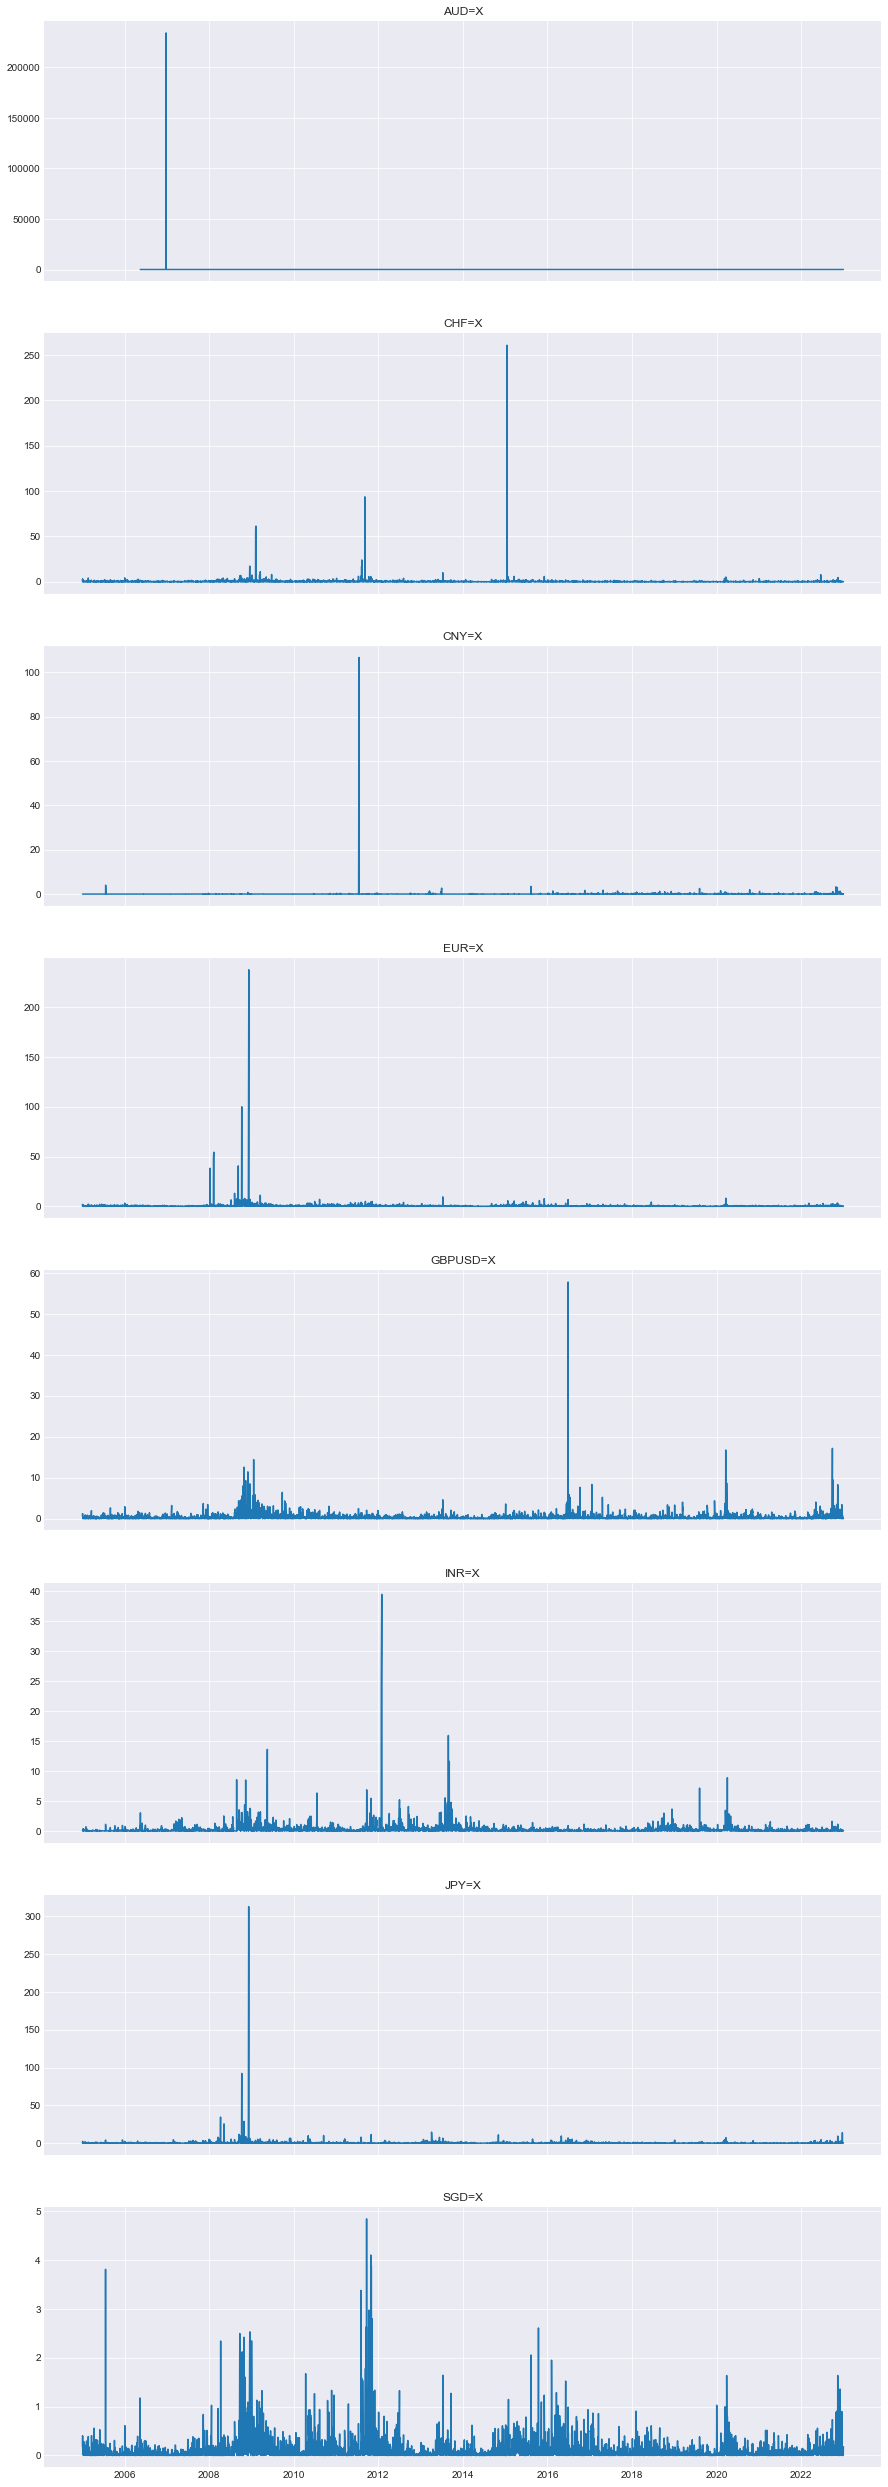

In [117]:
fig, ax = plt.subplots(8, 1, figsize=(15,45), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(fx_returns.columns)):
    ax[i].plot(fx_returns.iloc[:,i]**2,label= fx_returns.columns[i])
    ax[i].set_title(fx_returns.columns[i])
    
plt.show() 

### Commodities Volatility

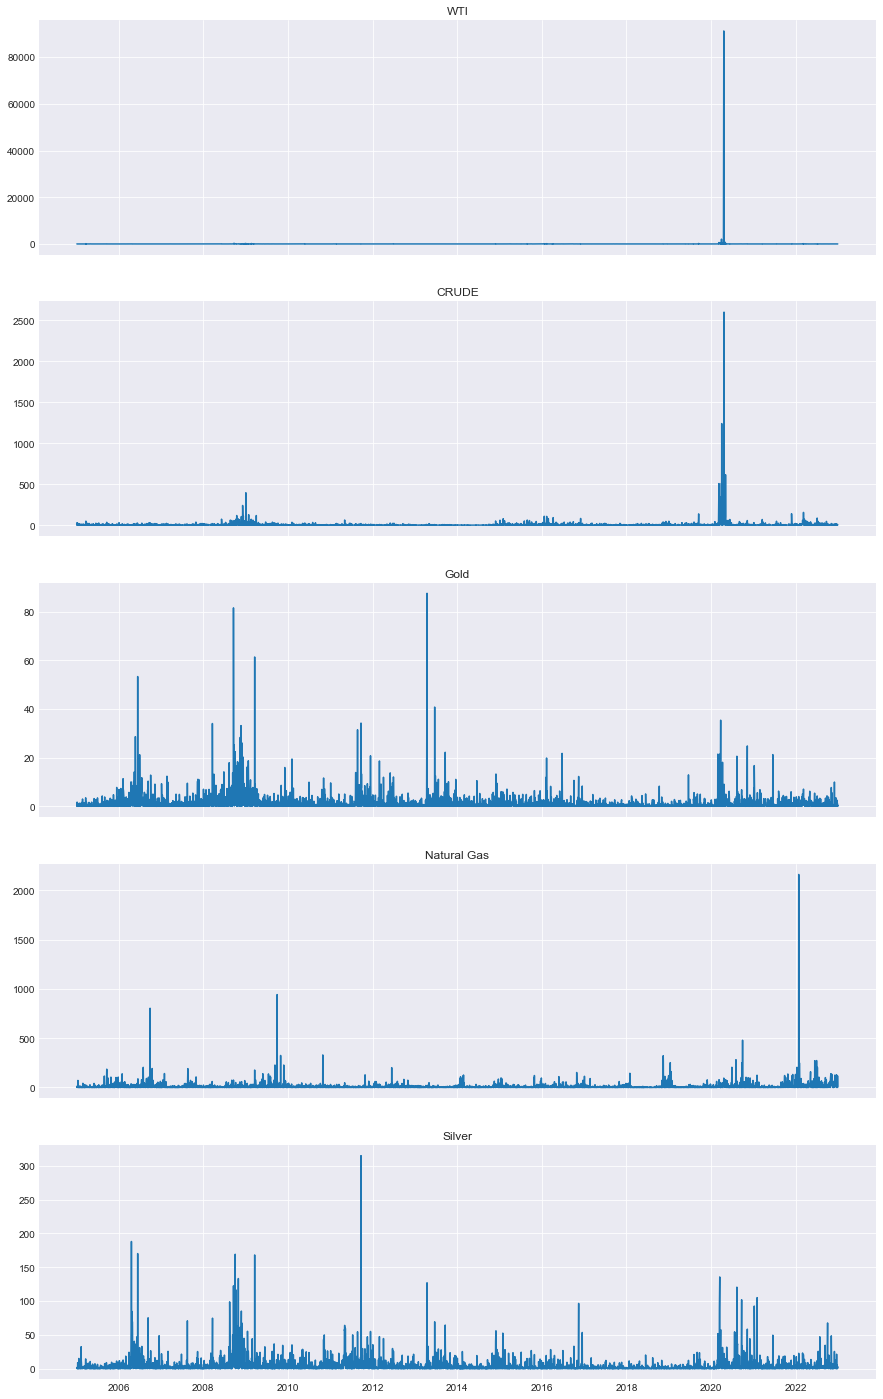

In [118]:
fig, ax = plt.subplots(5, 1, figsize=(15,25), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(commodity_returns.columns)):
    ax[i].plot(commodity_returns.iloc[:,i]**2,label= commodity_returns.columns[i])
    ax[i].set_title(commodity_returns.columns[i])
    
plt.show() 

### IR Volatility

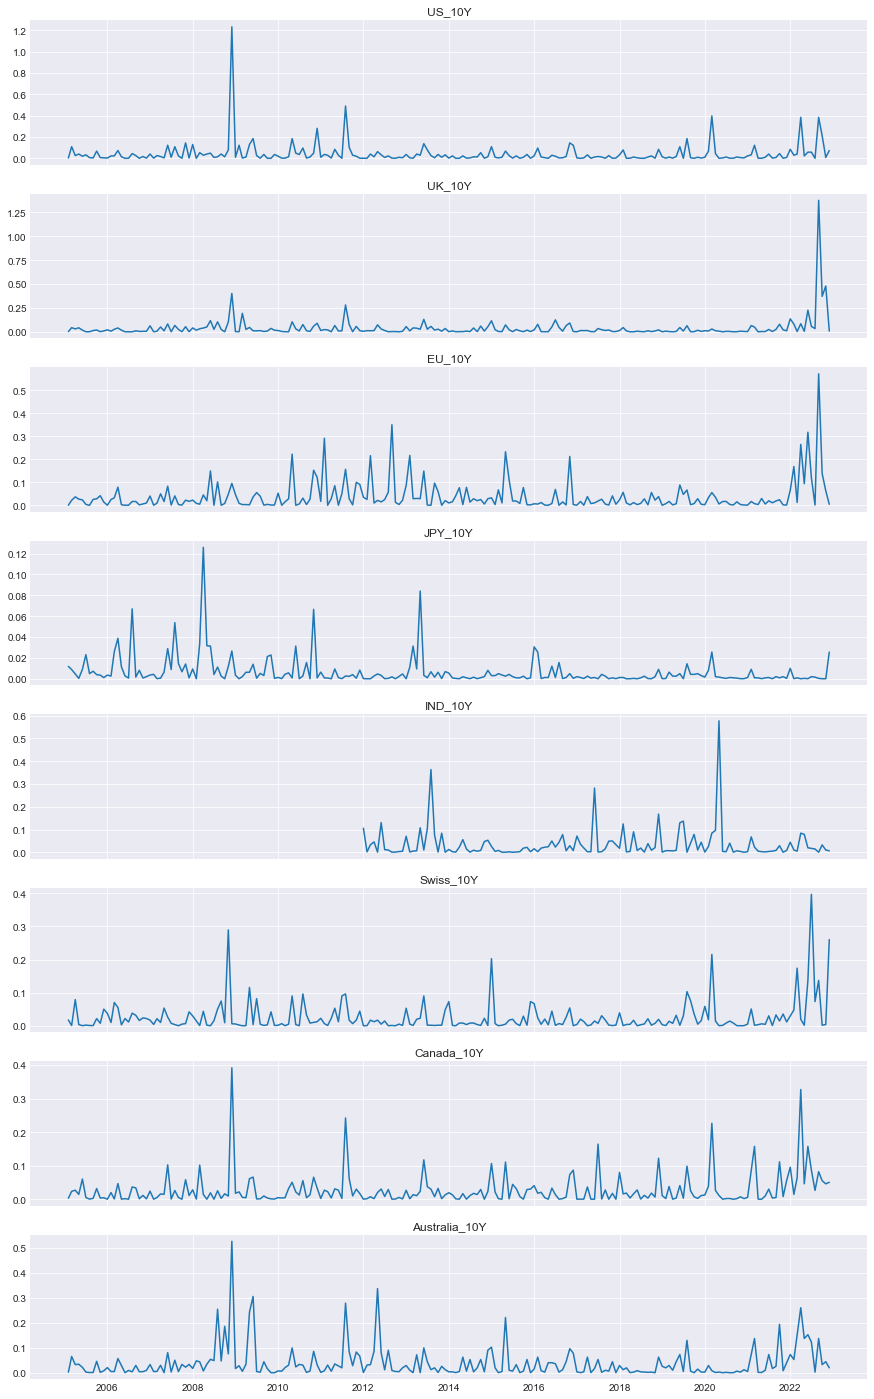

In [128]:
fig, ax = plt.subplots(8, 1, figsize=(15,25), sharex='col', sharey='row')
ax= ax.flatten()

for i in range(len(ir_returns.columns)):
    ax[i].plot(ir_returns.iloc[:,i]**2,label= ir_returns.columns[i])
    ax[i].set_title(ir_returns.columns[i])
    
plt.show() 